# Bias Any Stretch of the Imagination

## Living the sample life

### 2. Estimating the population of France

Let's consider the problem of counting how many people live in France. The standard approach is to take a census. This means contacting every household and asking how many people live there.

### 3. There are lots of people in France

Since there are millions of people in France, this is a really expensive process. Even with modern data collection technology, most countries will only conduct a census every five or ten years due to the cost.

### 4. Sampling households

In 1786, Pierre-Simon Laplace realized you could estimate the population with less effort. Rather than asking every household who lived there, he asked a small number of households and used statistics to estimate the number of people in the whole population. This technique of working with a subset of the whole population is called sampling.

### 5. Population vs. sample

Two definitions are important for this course. The population is the complete set of data that we are interested in. The previous example involved the literal population of France, but in statistics, it doesn't have to refer to people. One thing to bear in mind is that there is usually no equivalent of the census, so typically, we won't know what the whole population is like - more on this in a moment. The sample is the subset of data that we are working with.

### 6. Coffee rating dataset

Here's a dataset of professional ratings of coffees. Each row corresponds to one coffee, and there are thirteen hundred and thirty-eight rows in the dataset. The coffee is given a score from zero to one hundred, which is stored in the total_cup_points column. Other columns contain contextual information like the variety and country of origin and scores between zero and ten for attributes of the coffee such as aroma and body. These scores are averaged across all the reviewers for that particular coffee. It doesn't contain every coffee in the world, so we don't know exactly what the population of coffees is. However, there are enough here that we can think of it as our population of interest.

In [1]:
import itertools

import pandas as pd

coffee_rating = pd.read_feather("data/coffee_ratings_full.feather")
coffee_rating.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [2]:
coffee_rating.shape

(1338, 43)

### 7. Points vs. flavor: population

Let's consider the relationship between cup points and flavor by selecting those two columns. This dataset contains all thirteen hundred and thirty-eight rows from the original dataset.

In [3]:
pts_vs_flavor_pop = coffee_rating[["total_cup_points","flavor"]]
pts_vs_flavor_pop.head()

,total_cup_points,flavor
0,90.58,8.83
1,89.92,8.67
2,89.75,8.50
3,89.00,8.58
4,88.83,8.50


### 8. Points vs. flavor: 10 row sample

The pandas dot-sample method returns a random subset of rows. Setting n to ten means ten random rows are returned. By default, rows from the original dataset can't appear in the sample dataset multiple times, so we are guaranteed to have ten unique rows in our sample.

In [4]:
pts_vs_flavor_sample = pts_vs_flavor_pop.sample(n=10)
pts_vs_flavor_sample

,total_cup_points,flavor
820,81.92,7.58
1015,80.92,7.58
898,81.58,7.42
798,82.00,7.50
240,84.00,7.75
1020,80.92,7.33
296,83.75,7.67
268,83.92,7.58
377,83.42,7.67
11,87.92,8.42


### 9. Python sampling for Series

The dot-sample method also works on pandas Series. Here, using square-bracket subsetting retrieves the total_cup_points column as a Series, and the n argument specifies how many random values to return.

In [5]:
cup_points_samp = coffee_rating["total_cup_points"].sample(n=10)
cup_points_samp

1020    80.92
976     81.17
1275    75.58
789     82.08
495     83.08
1046    80.75
1243    77.92
1130    79.92
51      86.00
1186    79.17
Name: total_cup_points, dtype: float64

### 10. Population parameters & point estimates

A population parameter is a calculation made on the population dataset. We aren't limited to counting values either; here, we calculate the mean of the cup points using NumPy. By contrast, a point estimate, or sample statistic, is a calculation based on the sample dataset. Here, the mean of the total cup points is calculated on the sample. Notice that the means are very similar but not identical.

In [6]:
import numpy as np
np.mean(coffee_rating["total_cup_points"])

82.15120328849018

In [7]:
np.mean(cup_points_samp)

80.65899999999999

### 11. Point estimates with pandas

Working with pandas can be easier than working with NumPy. These mean calculations can be performed using the dot-mean pandas method.

In [8]:
pts_vs_flavor_pop["flavor"].mean()


7.526046337817636

In [9]:
pts_vs_flavor_sample["flavor"].mean()

7.65

### 12. Let's practice!

Let's start sampling!

## Simple sampling with pandas

<p>Throughout this chapter, you'll be exploring song data from Spotify. Each row of this population dataset represents a song, and there are over 40,000 rows. Columns include the song name, the artists who performed it, the release year, and attributes of the song like its duration, tempo, and danceability. You'll start by looking at the durations.</p>
<p>Your first task is to sample the Spotify dataset and compare the mean duration of the population with the sample.</p>
<p><code>spotify_population</code> is available and <code>pandas</code> is loaded as <code>pd</code>.</p>

In [10]:
spotify_population = pd.read_feather("data/spotify_2000_2020.feather")
spotify_population.shape

(41656, 20)

Sample 1000 rows from <code>spotify_population</code>, assigning to <code>spotify_sample</code>.

In [11]:
spotify_sample = spotify_population.sample(1000)
spotify_sample

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
8312,0.01420,['The Strokes'],0.620,375320.0,6.255333,0.780,0.0,6IRzBP4gVoV4D2zHmocoWy,0.011000,7.0,0.0833,-4.466,0.0,Eternal Summer,69.0,2020-04-10,0.0364,93.954,0.328,2020.0
20186,0.01030,['Cole Swindell'],0.602,169547.0,2.825783,0.851,0.0,0jgHUwPyki1mzZNErUhL96,0.000000,11.0,0.1910,-2.706,1.0,Hey Y'all,47.0,2014-02-18,0.0393,111.960,0.631,2014.0
38652,0.32900,['Tedeschi Trucks Band'],0.483,328853.0,5.480883,0.573,0.0,6P6PwoZNACtrkTsIZV8XS8,0.002840,7.0,0.0865,-8.850,1.0,Bound for Glory,49.0,2011-06-03,0.0376,90.742,0.512,2011.0
9440,0.02420,['Dixie Chicks'],0.703,258493.0,4.308217,0.689,0.0,6hRZ6K5MzPMKxUoEqHjBW0,0.000000,0.0,0.0757,-7.462,1.0,Goodbye Earl,46.0,2010,0.0293,122.814,0.802,2010.0
18994,0.00841,['...And You Will Know Us by the Trail of Dead'],0.255,273624.0,4.560400,0.858,0.0,2uO57D5iy4YJ9eMcbnlY8y,0.000355,7.0,0.5130,-5.085,1.0,Another Morning Stoner,35.0,2002-02-26,0.0694,144.653,0.237,2002.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3277,0.01910,['Arctic Monkeys'],0.434,183507.0,3.058450,0.912,0.0,577M06tqh2BwsT1qqZOBM1,0.278000,9.0,0.3260,-5.148,1.0,Don't Sit Down 'Cause I've Moved Your Chair,46.0,2011-06-07,0.0451,119.729,0.315,2011.0
37158,0.01390,"['Bad Bunny', 'Diplo', 'Nitti Gritti']",0.850,170509.0,2.841817,0.500,1.0,5jGUJXnELDaDTgiRjD9lsg,0.000384,8.0,0.0947,-6.708,1.0,200 Mph,70.0,2018-12-23,0.0665,160.020,0.816,2018.0
37431,0.11700,"['Famous Dex', 'Rich The Kid', 'Tyga']",0.929,177404.0,2.956733,0.636,1.0,4ugUxONjaw667etXxQUPR3,0.000000,7.0,0.0994,-5.366,1.0,What I Like (feat. Rich The Kid & Tyga),70.0,2020-04-03,0.2850,105.103,0.687,2020.0
2303,0.01450,['Blondie'],0.659,272267.0,4.537783,0.780,0.0,0P2fgmJp3a3PEu808hiQ1Y,0.034900,4.0,0.1810,-8.425,1.0,Heart Of Glass - Special Mix,41.0,2002-01-01,0.0309,114.421,0.808,2002.0


In [12]:
# Calculate the mean duration in mins from spotify_population
mean_dur_pop = spotify_population["duration_minutes"].mean()

# Calculate the mean duration in mins from spotify_sample
mean_dur_samp = spotify_sample["duration_minutes"].mean()

# Print the means
print(mean_dur_pop)
print(mean_dur_samp)

3.8521519140899896
3.8157025000000004


## Simple sampling and calculating with NumPy

<p>You can also use <code>numpy</code> to calculate parameters or statistics from a list or <code>pandas</code> Series.</p>
<p>You'll be turning it up to eleven and looking at the <code>loudness</code> property of each song.</p>
<p><code>spotify_population</code> is available and <code>numpy</code> is loaded as <code>np</code>.</p>

Create a <code>pandas</code> Series from the <code>loudness</code> column of <code>spotify_population</code>, assigning it to <code>loudness_pop</code>.

Sample <code>loudness_pop</code> to get 100 random values, assigning to <code>loudness_samp</code>.

In [13]:
# Create a pandas Series from the loudness column of spotify_population
loudness_pop = spotify_population["loudness"]

# Sample 100 values of loudness_pop
loudness_samp = loudness_pop.sample(100)

# Print the sample
print(loudness_samp)

40307    -3.713
2330     -9.883
37703    -7.184
4610    -11.169
26366    -9.576
          ...  
1521     -4.074
37990   -11.624
20178    -7.365
38682    -7.208
41523    -5.027
Name: loudness, Length: 100, dtype: float64


In [14]:
# Calculate the mean of loudness_pop
mean_loudness_pop = np.mean(loudness_pop)

# Calculate the mean of loudness_samp
mean_loudness_samp = np.mean(loudness_samp)

# Print the means
print(mean_loudness_pop)
print(mean_loudness_samp)

-7.366856851353918
-6.8285300000000015


## A little too convenient

### 1. A little too convenient

The point estimates you calculated in the previous exercises were very close to the population parameters that they were based on, but is this always the case?

### 2. The Literary Digest election prediction

In 1936, a newspaper called The Literary Digest ran an extensive poll to try to predict the next US presidential election. They phoned ten million voters and had over two million responses. About one-point-three million people said they would vote for Landon, and just under one million people said they would vote for Roosevelt. That is, Landon was predicted to get fifty-seven percent of the vote, and Roosevelt was predicted to get forty-three percent of the vote. Since the sample size was so large, it was presumed that this poll would be very accurate. However, in the election, Roosevelt won by a landslide with sixty-two percent of the vote. So what went wrong? Well, in 1936, telephones were a luxury, so the only people who had been contacted by The Literary Digest were relatively rich. The sample of voters was not representative of the whole population of voters, and so the poll suffered from sample bias. **The data was collected by the easiest method, in this case, telephoning people. This is called convenience sampling and is often prone to sample bias.** Before sampling, we need to think about our data collection process to avoid biased results.

<br>
<img src="image/img.png">

### 3. Finding the mean age of French people

Let's look at another example. While on vacation at Disneyland Paris, you start wondering about the mean age of French people. To get an answer, you ask ten people stood nearby about their ages. Their mean age is twenty-four-point-six years old. Do you think this will be a good estimate of the mean age of all French citizens?

### 4. How accurate was the survey?

On the left, you can see mean ages taken from the French census. Notice that the population has been gradually getting older as birth rates decrease and life expectancy increases. In 2015, the mean age was over forty, so our estimate of twenty-four-point-six is way off. The problem is that the family-friendly fun at Disneyland means that the sample ages weren't representative of the general population. There are generally more eight-year-olds than eighty-year-olds riding rollercoasters.

### 5. Convenience sampling coffee ratings

Let's return to the coffee ratings dataset and look at the mean cup points population parameter. The mean is about eighty-two. One form of convenience sampling would be to take the first ten rows, rather than the random rows we saw in the previous video. We can take the first 10 rows with the pandas head method. The mean cup points from this sample is higher at eighty-nine. The discrepancy suggests that coffees with higher cup points appear near the start of the dataset. Again, the convenience sample isn't representative of the whole population.

In [15]:
coffee_rating["total_cup_points"].mean()

82.15120328849018

In [16]:
coffee_rating_first10 = coffee_rating.head(10)
coffee_rating_first10

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,None,wolensu,None,yidnekachew debessa coffee plantation,1800-2200,...,Green,2.0,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,Bluish-Green,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
6,88.75,Arabica,hugo valdivia,Peru,None,None,hvc,None,richmond investment-coffee department,None,...,Bluish-Green,0.0,"September 17th, 2013",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
7,88.67,Arabica,ethiopia commodity exchange,Ethiopia,aolme,None,c.p.w.e,010/0338,None,1570-1700,...,None,0.0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
8,88.42,Arabica,ethiopia commodity exchange,Ethiopia,aolme,None,c.p.w.e,010/0338,None,1570-1700,...,None,0.0,"September 2nd, 2011",Ethiopia Commodity Exchange,a176532400aebdc345cf3d870f84ed3ecab6249e,61bbaf6a9f341e5782b8e7bd3ebf76aac89fe24b,m,1570.0,1700.0,1635.0
9,88.25,Arabica,diamond enterprise plc,Ethiopia,tulla coffee farm,None,tulla coffee farm,2014/15,diamond enterprise plc,1795-1850,...,Green,4.0,"March 29th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1795.0,1850.0,1822.5


In [17]:
coffee_rating_first10["total_cup_points"].mean()

89.1

### 6. Visualizing selection bias

Histograms are a great way to visualize the selection bias. We can create a histogram of the total cup points from the population, which contains values ranging from around 59 to around 91. The numpy-dot-arange function can be used to create bins of width 2 from 59 to 91. Recall that the stop value in numpy-dot-arange is exclusive, so we specify 93, not 91. Here's the same code to generate a histogram for the convenience sample.

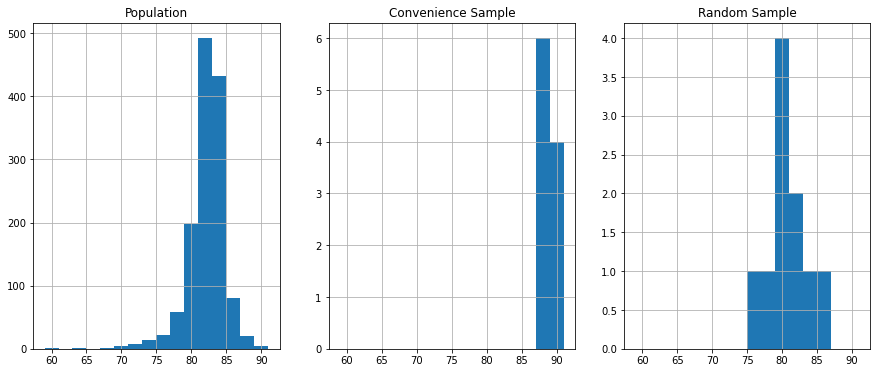

In [18]:
import matplotlib.pyplot as plt

fig,(ax1,ax2,ax3) =plt.subplots(nrows=1,ncols=3,figsize=(15,6))
coffee_rating["total_cup_points"].hist(bins=np.arange(59,93,2),ax=ax1)
coffee_rating_first10["total_cup_points"].hist(bins=np.arange(59,93,2),ax=ax2)
cup_points_samp.hist(bins=np.arange(59,93,2),ax=ax3)
ax1.set_title("Population")
ax2.set_title("Convenience Sample")
ax3.set_title("Random Sample")
plt.show()



### 7. Distribution of a population and of a convenience sample

Comparing the two histograms, it is clear that the distribution of the sample is not the same as the population: all of the sample values are on the right-hand side of the plot.

### 8. Visualizing selection bias for a random sample

This time, we'll compare the total_cup_points distribution of the population with a random sample of 10 coffees.

### 9. Distribution of a population and of a simple random sample

Notice how the shape of the distributions is more closely aligned when random sampling is used.

### 10. Let's practice!

Let's plot some histograms!

## Are the findings from this sample generalizable?

<p>You just saw how convenience sampling—collecting data using the easiest method—can result in samples that aren't representative of the population. Equivalently, this means findings from the sample are not generalizable to the population. Visualizing the distributions of the population and the sample can help determine whether or not the sample is representative of the population.</p>
<p>The Spotify dataset contains an <code>acousticness</code> column, which is a confidence measure from zero to one of whether the track was made with instruments that aren't plugged in. You'll compare the <code>acousticness</code> distribution of the total population of songs with a sample of those songs.</p>
<p><code>spotify_population</code> and <code>spotify_mysterious_sample</code> are available; <code>pandas</code> as <code>pd</code>, <code>matplotlib.pyplot</code> as <code>plt</code>, and <code>numpy</code> as <code>np</code> are loaded.</p>

Plot a histogram of the <code>acousticness</code> from <code>spotify_population</code> with bins of width <code>0.01</code> from <code>0</code> to <code>1</code> using pandas <code>.hist()</code>.

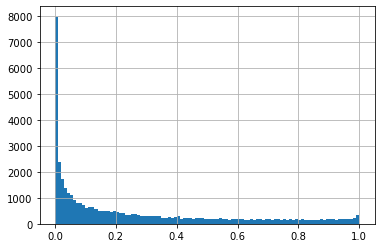

In [19]:
# Visualize the distribution of acousticness with a histogram
spotify_population["acousticness"].hist(bins=np.arange(0,1.01,0.01))
plt.show()

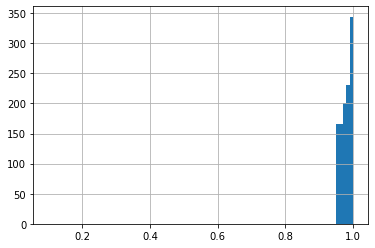

In [20]:
spotify_mysterious_sample = spotify_population[spotify_population["acousticness"] > 0.95]
spotify_mysterious_sample["acousticness"].hist(bins=np.arange(0.1,1.01,0.01))
plt.show()

<div class="exercise--instructions"><div class="dc-u-pb-8"><h4>Question</h4><div class=""><p><em>Compare the two histograms you drew.</em> Are the <code>acousticness</code> values in the sample generalizable to the general population?</p></div></div><div class="exercise--instructions-title"><h5>Possible Answers</h5></div><div class="exercise--typography exercise--multiple-choice-focused"><ul class="exercise--multiple-choice"><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_0" class="dc-input-radio" data-cy="mce-option"><input id="inp_0" data-cy="multiple-choice-input-0" type="radio" class="dc-input-radio__input" value="1"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">Yes. Any sample should lead to a generalizable result about the population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_1" class="dc-input-radio" data-cy="mce-option"><input id="inp_1" data-cy="multiple-choice-input-1" type="radio" class="dc-input-radio__input" value="2"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">Yes. The sample selected is likely a random sample of all songs in our population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_2" class="dc-input-radio" data-cy="mce-option"><input id="inp_2" data-cy="multiple-choice-input-2" type="radio" class="dc-input-radio__input" value="3"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">No. Samples can never lead to generalizable results about the population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_3" class="dc-input-radio" data-cy="mce-option"><input id="inp_3" data-cy="multiple-choice-input-3" type="radio" class="dc-input-radio__input" value="4"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">No. The <code>acousticness</code> samples are consistently higher than those in the general population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_4" class="dc-input-radio" data-cy="mce-option"><input id="inp_4" data-cy="multiple-choice-input-4" type="radio" class="dc-input-radio__input" value="5"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">No. The <code>acousticness</code> samples are consistently lower than those in the general population.</div></label></div></div></li></ul>

The acousticness values in the sample are all greater than 0.95, whereas they range from 0 to 1 in the whole population.

## Are these findings generalizable?

<p>Let's look at another sample to see if it is representative of the population. This time, you'll look at the <code>duration_minutes</code> column of the Spotify dataset, which contains the length of the song in minutes.</p>
<p><code>spotify_population</code> and <code>spotify_mysterious_sample2</code> are available; <code>pandas</code>, <code>matplotlib.pyplot</code>, and <code>numpy</code> are loaded using their standard aliases.</p>

Plot a histogram of <code>duration_minutes</code> from <code>spotify_population</code> with bins of width <code>0.5</code> from <code>0</code> to <code>15</code> using pandas <code>.hist()</code>.

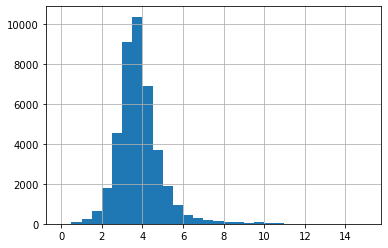

In [21]:
# Visualize the distribution of duration_minutes as a histogram
spotify_population["duration_minutes"].hist(bins=np.arange(0,15.5,0.5))
plt.show()

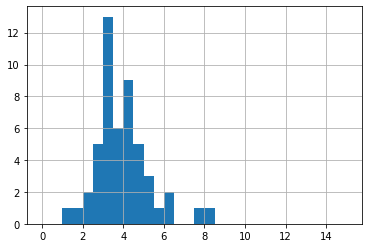

In [22]:
spotify_mysterious_sample2 = spotify_population.sample(50)
spotify_mysterious_sample2["duration_minutes"].hist(bins=np.arange(0,15.1,0.5))
plt.show()

<div class="exercise--instructions"><div class="dc-u-pb-8"><h4>Question</h4><div class=""><p><em>Compare the two histograms you drew.</em> Are the duration values in the sample generalizable to the general population?</p></div></div><div class="exercise--instructions-title"><h5>Possible Answers</h5></div><div class="exercise--typography"><ul class="exercise--multiple-choice"><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_0" class="dc-input-radio" data-cy="mce-option"><input id="inp_0" data-cy="multiple-choice-input-0" type="radio" class="dc-input-radio__input" value="1"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">Yes. Any sample should lead to a generalizable result about the population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_1" class="dc-input-radio" data-cy="mce-option"><input id="inp_1" data-cy="multiple-choice-input-1" type="radio" class="dc-input-radio__input" value="2" checked=""><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">Yes. The sample selected is likely a random sample of all songs in the population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_2" class="dc-input-radio" data-cy="mce-option"><input id="inp_2" data-cy="multiple-choice-input-2" type="radio" class="dc-input-radio__input" value="3"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">No. Samples can never lead to generalizable results about the population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_3" class="dc-input-radio" data-cy="mce-option"><input id="inp_3" data-cy="multiple-choice-input-3" type="radio" class="dc-input-radio__input" value="4"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">No. The duration samples are consistently higher than those in the general population.</div></label></div></div></li><li class="multiple-choice__item"><div class="dc-u-fx dc-u-fx-jcsb multiple-choice__options"><div><label for="inp_4" class="dc-input-radio" data-cy="mce-option"><input id="inp_4" data-cy="multiple-choice-input-4" type="radio" class="dc-input-radio__input" value="5"><span class="dc-input-radio__indicator"></span><div class="dc-input-radio__text">No. The duration samples are consistently lower than those in the general population.</div></label></div></div></li></ul>

## How does Sue do sampling?

### 1. How does Sue do sampling?

You previously saw how to use a random sample to get results similar to those in the population. But how does a computer actually do this random sampling?

### 2. What does random mean?

There are several meanings of random in English. This definition from Oxford Languages is the most interesting for us. If we want to choose data points at random from a population, we shouldn't be able to predict which data points would be selected ahead of time in some systematic way.

### 3. True random numbers

To generate truly random numbers, we typically have to use a physical process like flipping coins or rolling dice. The Hotbits service generates numbers from radioactive decay, and RANDOM-dot-ORG generates numbers from atmospheric noise, which are radio signals generated by lightning. Unfortunately, these processes are fairly slow and expensive for generating random numbers.

### 4. Pseudo-random number generation

For most use cases, pseudo-random number generation is better since it is cheap and fast. Pseudo-random means that although each value appears to be random, it is actually calculated from the previous random number. Since you have to start the calculations somewhere, the first random number is calculated from what is known as a seed value. The word random is in quotes to emphasize that this process isn't really random. If we start from a particular seed value, all future numbers will be the same.

### 5. Pseudo-random number generation example

For example, suppose we have a function to generate pseudo-random values called calc_next_random. To begin, we pick a seed number, in this case, one. calc_next_random does some calculations and returns three. We then feed three into calc_next_random, and it does the same set of calculations and returns two. And if we can keep feeding in the last number, it will return something apparently random. Although the process is deterministic, the trick to a random number generator is to make it look like the values are random.

### 6. Random number generating functions

NumPy has many functions for generating random numbers from statistical distributions. To use each of these, make sure to prepend each function name with numpy-dot-random or np-dot-random. Some of them, like dot-uniform and dot-normal, may be familiar. Others have more niche applications.

### 7. Visualizing random numbers

Let's generate some pseudo-random numbers. The first arguments to each random number function specify distribution parameters. The size argument specifies how many numbers to generate, in this case, five thousand. We've chosen the beta distribution, and its parameters are named a and b. These random numbers come from a continuous distribution, so a great way to visualize them is with a histogram. Here, because the numbers were generated from the beta distribution, all the values are between zero and one.

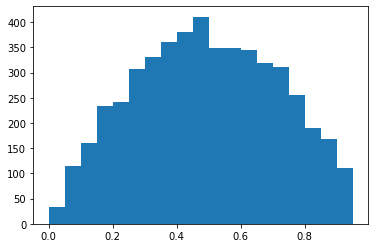

In [23]:
randoms = np.random.beta(a=2,b=2,size=5000)
plt.hist(randoms,bins=np.arange(0,1,0.05))
plt.show()

### 8. Random numbers seeds

To set a random seed with NumPy, we use the dot-random-dot-seed method. random-dot-seed takes an integer for the seed number, which can be any number you like. dot-normal generates pseudo-random numbers from the normal distribution. The loc and scale arguments set the mean and standard deviation of the distribution, and the size argument determines how many random numbers from that distribution will be returned. If we call dot-normal a second time, we get two different random numbers. If we reset the seed by calling random-dot-seed with the same seed number, then call dot-normal again, we get the same numbers as before. This makes our code reproducible.

In [24]:
np.random.seed((20000229))
np.random.normal(loc=2,scale=1.5,size=2)

array([-0.59030264,  1.87821258])

In [25]:
np.random.normal(loc=2,scale=1.5,size=2)

array([2.52619561, 4.9684949 ])

In [26]:
np.random.seed(20000229)
np.random.normal(loc=2,scale=1.5,size=2)

array([-0.59030264,  1.87821258])

### 9. Using a different seed

Now let's try a different seed. This time, calling dot-normal generates different numbers.

### 10. Let's practice!

Let's sow some random seeds!

## Generating random numbers

<p>You've used <code>.sample()</code> to generate pseudo-random numbers from a set of values in a DataFrame. A related task is to generate random numbers that follow a statistical distribution, like the uniform distribution or the normal distribution.</p>
<p>Each random number generation function has distribution-specific arguments and an argument for specifying the number of random numbers to generate.</p>
<p><code>matplotlib.pyplot</code> is loaded as <code>plt</code>, and <code>numpy</code> is loaded as <code>np</code>.</p>

Generate 5000 numbers from a uniform distribution, setting the parameters <code>low</code> to <code>-3</code> and <code>high</code> to <code>3</code>.

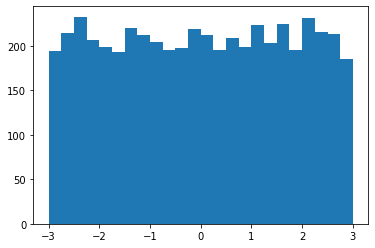

In [27]:
# Generate random numbers from a Uniform(-3, 3)
uniforms = np.random.uniform(low=-3, high=3, size=5000)

# Plot a histogram of uniform values, binwidth 0.25
plt.hist(uniforms,bins=np.arange(-3,3.0001,0.25))
plt.show()

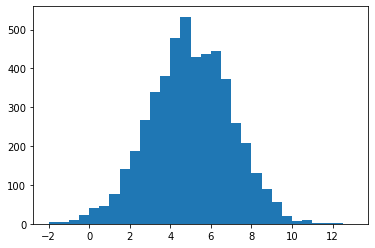

In [28]:
# Generate random numbers from a Normal(5, 2)
normals = np.random.normal(loc=5, scale=2, size=5000)

# Plot a histogram of normal values, binwidth 0.5
plt.hist(normals,bins=np.arange(-2,13.0001,.5))
plt.show()

# Don't get theory eyed

## Simple is as simple does

### 1. Simple is as simple does

There are several methods of sampling from a population. In this video, we'll look at simple random sampling and systematic random sampling.

### 2. Simple random sampling

Simple random sampling works like a raffle or lottery. We start with our population of raffle tickets or lottery balls and randomly pick them out one at a time.

<br>
<img src="image/img_1.png">

### 3. Simple random sampling of coffees

In our coffee ratings dataset, instead of raffle tickets or lottery balls, the population consists of coffee varieties. To perform simple random sampling, we take some at random, one at a time. Each coffee has the same chance as any other of being picked. When using this technique, sometimes we might end up with two coffees that were next to each other in the dataset, and sometimes we might end up with large areas of the dataset that were not selected from at all.

In [29]:
coffee_rating.sample(n=5,random_state=19000113)


,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
437,83.25,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora bonanza - armenia quindioa,3-68-0205,None,1600-1800msnm,...,None,0.0,"June 13th, 2012",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1600.0,1800.0,1700.0
285,83.83,Arabica,ipanema coffees,Brazil,fazenda rio verde,None,ipanema coffees,002/4177/0121,ipanema coffees,1260,...,Green,0.0,"December 26th, 2014",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1260.0,1260.0,1260.0
784,82.08,Arabica,cafe politico,Colombia,None,None,None,3-59-1656,cafe politico,None,...,Green,0.0,"September 12th, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,NaN,NaN,NaN
648,82.58,Arabica,exportadora de cafe condor s.a,Colombia,None,None,trilladora boananza,3-68-0140,exportadora de cafe condor s.a,1750 msnm,...,Green,0.0,"February 27th, 2014",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1750.0,1750.0,1750.0
155,84.58,Arabica,exportadora de cafe condor s.a,Colombia,various,None,trilladora boananza,3-68-0005,exportadora de cafe condor s.a,1800 msnm,...,Green,6.0,"October 9th, 2013",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,1800.0,1800.0,1800.0


### 4. Simple random sampling with pandas

We've already seen how to do simple random sampling with pandas. We call dot-sample and set n to the size of the sample. We can also set the seed using the random_state argument to generate reproducible results, just like we did pseudo-random number generation. Previously, by not setting random_state when sampling, our code would generate a different random sample each time it was run.

### 5. Systematic sampling

Another sampling method is known as systematic sampling. This samples the population at regular intervals. Here, looking from top to bottom and left to right within each row, every fifth coffee is sampled.

<br>
<img src="image/img_2.png">

### 6. Systematic sampling - defining the interval

Systematic sampling with pandas is slightly trickier than simple random sampling. The tricky part is determining how big the interval between each row should be for a given sample size. Suppose we want a sample size of five coffees. The population size is the number of rows in the whole dataset, and in this case, it's one thousand three hundred and thirty-eight. The interval is the population size divided by the sample size, but because we want the answer to be an integer, we perform integer division with two forward slashes. This is like standard division but discards any fractional part. One-three-three-eight divided by five is actually two hundred and sixty-seven-point-six, and discarding the fractional part leaves two hundred and sixty-seven. Thus, to get a systematic sample of five coffees, we will select every two hundred sixty-seventh coffee in the dataset.

In [30]:
sample_size = 5
pop_size = len(coffee_rating)
print(pop_size)

1338


In [31]:
interval = pop_size // sample_size
print(interval)

267


### 7. Systematic sampling - selecting the rows

To select every two hundred and sixty-seventh row, we call dot-iloc on coffee_ratings and pass double-colons and the interval, which is 267 in this case. Double-colon interval tells pandas to select every two hundred and sixty-seventh row from zero to the end of the DataFrame.

In [32]:
coffee_rating.iloc[::interval]

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,None,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0.0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
267,83.92,Arabica,federacion nacional de cafeteros,Colombia,None,None,None,01-1969,federacion nacional de cafeteros,None,...,None,1.0,"March 11th, 2016",Almacafé,e493c36c2d076bf273064f7ac23ad562af257a25,70d3c0c26f89e00fdae6fb39ff54f0d2eb1c38ab,m,NaN,NaN,NaN
534,82.92,Arabica,consejo salvadoreño del café,El Salvador,santa josefita,1-198,beneficio cuzcachapa,09-030-273,soc. coop. cuzcachapa de r.l.,1350,...,Green,1.0,"August 28th, 2018",Salvadoran Coffee Council,3d4987e3b91399dbb3938b5bdf53893b6ef45be1,27b21e368fb8291cbea02c60623fe6c98f84524d,m,1350.0,1350.0,1350.0
801,82.00,Arabica,"lin, che-hao krude 林哲豪",Taiwan,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",None,"you siang coffee farmtainan, taiwan 台灣台南優香咖啡",Taiwan,"red on tree co., ltd.",600m,...,Green,0.0,"July 22nd, 2015",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,600.0,600.0,600.0
1068,80.50,Arabica,cqi taiwan icp cqi台灣合作夥伴,Taiwan,王秋金,1,non,None,王秋金,50,...,Blue-Green,0.0,"December 8th, 2018",Blossom Valley International,fc45352eee499d8470cf94c9827922fb745bf815,de73fc9412358b523d3a641501e542f31d2668b0,m,50.0,50.0,50.0
1335,77.17,Robusta,james moore,United States,fazenda cazengo,None,cafe cazengo,None,global opportunity fund,795 meters,...,None,6.0,"December 23rd, 2015",Specialty Coffee Association,ff7c18ad303d4b603ac3f8cff7e611ffc735e720,352d0cf7f3e9be14dad7df644ad65efc27605ae2,m,795.0,795.0,795.0


### 8. The trouble with systematic sampling

There is a problem with systematic sampling, though. Suppose we are interested in statistics about the aftertaste attribute of the coffees. To examine this, first, we use reset_index to create a column of index values in our DataFrame that we can plot. Plotting aftertaste against index shows a pattern. Earlier rows generally have higher aftertaste scores than later rows. This introduces bias into the statistics that we calculate. In general, it is only safe to use systematic sampling if a plot like this has no pattern; that is, it just looks like noise.

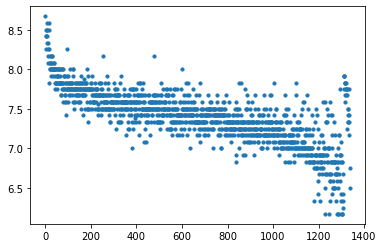

In [33]:
plt.scatter(coffee_rating.index,coffee_rating.aftertaste,s=10)
plt.show()

### 9. Making systematic sampling safe

To ensure that systematic sampling is safe, we can randomize the row order before sampling. dot-sample has an argument named frac that lets us specify the proportion of the dataset to return in the sample, rather than the absolute number of rows that n specifies. Setting frac to one randomly samples the whole dataset. In effect, this randomly shuffles the rows. Next, the indices need to be reset so that they go in order from zero again. Specifying drop equals True clears the previous row indexes, and chaining to another reset_index call creates a column containing these new indexes. Redrawing the plot with the shuffled dataset shows no pattern between aftertaste and index. This is great, but note that once we've shuffled the rows, systematic sampling is essentially the same as simple random sampling.

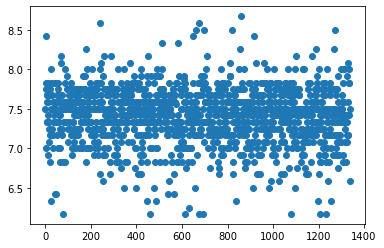

In [34]:
shuffled = coffee_rating.sample(frac=1).reset_index(drop=True)
plt.scatter(shuffled.index,shuffled.aftertaste)
plt.show()

### 10. Let's practice!

Let's get sampling!

## Simple random sampling

<p>The simplest method of sampling a population is the one you've seen already. It is known as <em>simple random sampling</em> (sometimes abbreviated to "SRS"), and involves picking rows at random, one at a time, where each row has the same chance of being picked as any other. </p>
<p>In this chapter, you'll apply sampling methods to a synthetic (fictional) employee attrition dataset from IBM, where "attrition" in this context means leaving the company.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code> as <code>pd</code> is loaded.</p>

In [35]:
attrition_pop = pd.read_feather("data/attrition.feather")
attrition_pop.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,21,0.0,Travel_Rarely,391,Research_Development,15,College,Life_Sciences,High,Male,...,Excellent,Very_High,0,0,6,Better,0,0,0,0
1,19,1.0,Travel_Rarely,528,Sales,22,Below_College,Marketing,Very_High,Male,...,Excellent,Very_High,0,0,2,Good,0,0,0,0
2,18,1.0,Travel_Rarely,230,Research_Development,3,Bachelor,Life_Sciences,High,Male,...,Excellent,High,0,0,2,Better,0,0,0,0
3,18,0.0,Travel_Rarely,812,Sales,10,Bachelor,Medical,Very_High,Female,...,Excellent,Low,0,0,2,Better,0,0,0,0
4,18,1.0,Travel_Frequently,1306,Sales,5,Bachelor,Marketing,Medium,Male,...,Excellent,Very_High,0,0,3,Better,0,0,0,0
5,27,0.0,Non-Travel,443,Research_Development,3,Bachelor,Medical,Very_High,Male,...,Excellent,High,3,0,6,Good,0,0,0,0
6,18,0.0,Non-Travel,287,Research_Development,5,College,Life_Sciences,Medium,Male,...,Excellent,Very_High,0,0,2,Better,0,0,0,0
7,18,1.0,Non-Travel,247,Research_Development,8,Below_College,Medical,High,Male,...,Excellent,Very_High,0,0,0,Better,0,0,0,0
8,18,0.0,Non-Travel,1124,Research_Development,1,Bachelor,Life_Sciences,Very_High,Female,...,Excellent,High,0,0,5,Best,0,0,0,0
9,18,1.0,Travel_Frequently,544,Sales,3,College,Medical,Medium,Female,...,Excellent,High,0,0,2,Best,0,0,0,0


Sample 70 rows from <code>attrition_pop</code> using simple random sampling, setting the random seed to <code>18900217</code>.

Print the sample dataset, <code>attrition_samp</code>. <em>What do you notice about the indices?</em>

In [37]:
# Sample 70 rows using simple random sampling and set the seed
attrition_samp = attrition_pop.sample(n=70,random_state=18900217)

# Print the sample
print(attrition_samp)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1134   35        0.0      Travel_Rarely        583  Research_Development   
1150   52        0.0         Non-Travel        585                 Sales   
531    33        0.0      Travel_Rarely        931  Research_Development   
395    31        0.0      Travel_Rarely       1332  Research_Development   
392    29        0.0      Travel_Rarely        942  Research_Development   
...   ...        ...                ...        ...                   ...   
361    27        0.0  Travel_Frequently       1410                 Sales   
1180   36        0.0      Travel_Rarely        530                 Sales   
230    26        0.0      Travel_Rarely       1443                 Sales   
211    29        0.0  Travel_Frequently        410  Research_Development   
890    30        0.0  Travel_Frequently       1312  Research_Development   

      DistanceFromHome      Education    EducationField  \
1134                25      

## Systematic sampling

<p>One sampling method that avoids randomness is called <em>systematic sampling</em>. Here, you pick rows from the population at regular intervals.</p>
<p>For example, if the population dataset had one thousand rows, and you wanted a sample size of five, you could pick rows <code>0</code>, <code>200</code>, <code>400</code>, <code>600</code>, and <code>800</code>.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code> has been pre-loaded as <code>pd</code>.</p>

Set the sample size to <code>70</code>.

Calculate the population size from <code>attrition_pop</code>.

Calculate the interval between the rows to be sampled.

In [38]:
# Set the sample size to 70
sample_size = 70

# Calculate the population size from attrition_pop
pop_size = len(attrition_pop)

# Calculate the interval
interval = pop_size // sample_size

In [39]:
# Systematically sample 70 rows
attrition_sys_samp = attrition_pop.iloc[::interval]

# Print the sample
print(attrition_sys_samp)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
21     19        0.0  Travel_Rarely       1181  Research_Development   
42     45        0.0  Travel_Rarely        252  Research_Development   
63     23        0.0  Travel_Rarely        373  Research_Development   
84     30        1.0  Travel_Rarely        945                 Sales   
...   ...        ...            ...        ...                   ...   
1365   48        0.0  Travel_Rarely        715  Research_Development   
1386   48        0.0  Travel_Rarely       1355  Research_Development   
1407   50        0.0  Travel_Rarely        989  Research_Development   
1428   50        0.0     Non-Travel        881  Research_Development   
1449   52        0.0  Travel_Rarely        699  Research_Development   

      DistanceFromHome      Education EducationField EnvironmentSatisfaction  \
0                   15        College  Life_Sciences   

## Is systematic sampling OK?

<p>Systematic sampling has a problem: if the data has been sorted, or there is some sort of pattern or meaning behind the row order, then the resulting sample may not be representative of the whole population. The problem can be solved by shuffling the rows, but then systematic sampling is equivalent to simple random sampling.</p>
<p>Here you'll look at how to determine whether or not there is a problem.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code>  is loaded as <code>pd</code>, and <code>matplotlib.pyplot</code> as <code>plt</code>.</p>

Add an index column to <code>attrition_pop</code>, assigning the result to <code>attrition_pop_id</code>.

Create a scatter plot of <code>YearsAtCompany</code> versus <code>index</code> for <code>attrition_pop_id</code>.

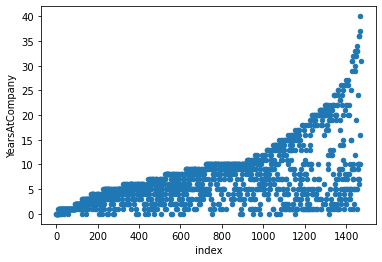

In [40]:
# Add an index column to attrition_pop
attrition_pop_id = attrition_pop.reset_index()

# Plot YearsAtCompany vs. index for attrition_pop_id
attrition_pop_id.plot(x="index",y="YearsAtCompany",kind="scatter")
plt.show()

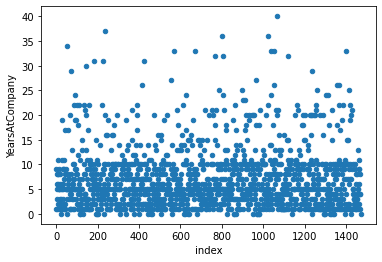

In [41]:
# Shuffle the rows of attrition_pop
attrition_shuffled = attrition_pop.sample(frac=1)

# Reset the row indexes and create an index column
attrition_shuffled = attrition_shuffled.reset_index(drop=True).reset_index()

# Plot YearsAtCompany vs. index for attrition_shuffled
attrition_shuffled.plot(x="index",y="YearsAtCompany",kind="scatter")
plt.show()

## Can't get no stratisfaction

### 1. Can't get no stratisfaction

Stratified sampling is a technique that allows us to sample a population that contains subgroups.

### 2. Coffees by country

For example, we could group the coffee ratings by country. If we count the number of coffees by country using the value_counts method, we can see that these six countries have the most data.

<br>
<img src="image/img_3.png">

In [73]:
top_counts =coffee_rating["country_of_origin"].value_counts()
top_counts[:6]

Mexico                    236
Colombia                  183
Guatemala                 181
Brazil                    132
Taiwan                     75
United States (Hawaii)     73
Name: country_of_origin, dtype: int64

### 3. Filtering for 6 countries

To make it easier to think about sampling subgroups, let's limit our analysis to these six countries. We can use the dot-isin method to filter the population and only return the rows corresponding to these six countries. This filtered dataset is stored as coffee_ratings_top.

In [74]:
top_counted_subset = coffee_rating["country_of_origin"].isin(top_counts[:6].index.values)
coffee_rating_top = coffee_rating[top_counted_subset]
coffee_rating_top.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",None,None,None,None,1600 - 1800 m,...,None,0.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
5,88.83,Arabica,ji-ae ahn,Brazil,None,None,None,None,None,None,...,Bluish-Green,1.0,"September 3rd, 2014",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,NaN,NaN,NaN
13,87.92,Arabica,grounds for health admin,United States (Hawaii),arianna farms,None,None,None,None,2000 ft,...,None,2.0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,ft,609.6,609.6,609.6
22,87.17,Arabica,roberto licona franco,Mexico,la herradura,None,la herradura,0,None,1320,...,Green,0.0,"July 26th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,1320.0,1320.0,1320.0
25,86.92,Arabica,nucoffee,Brazil,fazenda kaquend,None,None,002/1251/0073,nucoffee,1250m,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1250.0,1250.0,1250.0


### 4. Counts of a simple random sample

Let's take a ten percent simple random sample of the dataset using dot-sample with frac set to zero-point-one. We also set the random_state argument to ensure reproducibility. As with the whole dataset, we can look at the counts for each country. To make comparisons easier, we set normalize to True to convert the counts into a proportion, which shows what proportion of coffees in the sample came from each country.

In [75]:
coffee_rating_top.shape[0] * 0.1

88.0

In [76]:
coffee_rating_samp = coffee_rating_top.sample(frac=0.1,random_state=2021)
coffee_rating_samp["country_of_origin"].value_counts(normalize=True)

Mexico                    0.250000
Guatemala                 0.204545
Colombia                  0.181818
Brazil                    0.181818
United States (Hawaii)    0.102273
Taiwan                    0.079545
Name: country_of_origin, dtype: float64

In [77]:
coffee_rating_samp.shape[0]

88

### 5. Comparing proportions

Here are the proportions for the population and the ten percent sample side by side. Just by chance, in this sample, Taiwanese coffees form a disproportionately low percentage. The different makeup of the sample compared to the population could be a problem if we want to analyze the country of origin, for example.

In [78]:
coffee_comp_prop = pd.DataFrame()
coffee_comp_prop = coffee_comp_prop.assign(population = coffee_rating_top["country_of_origin"].value_counts(normalize=True)[:6],ten_perc_sample = coffee_rating_samp["country_of_origin"].value_counts(normalize=True) )
coffee_comp_prop

,population,ten_perc_sample
Mexico,0.268182,0.250000
Colombia,0.207955,0.181818
Guatemala,0.205682,0.204545
Brazil,0.150000,0.181818
Taiwan,0.085227,0.079545
United States (Hawaii),0.082955,0.102273


### 6. Proportional stratified sampling

If we care about the proportions of each country in the sample closely matching those in the population, then we can group the data by country before taking the simple random sample. Note that we used the Python line continuation backslash here, which can be useful for breaking up longer chains of pandas code like this. Calling the dot-sample method after grouping takes a simple random sample within each country. Now the proportions of each country in the stratified sample are much closer to those in the population.

In [79]:
coffee_rating_strat = coffee_rating_top.groupby("country_of_origin").sample(frac=0.1,random_state=2021)
coffee_comp_prop = coffee_comp_prop.assign(strata_sample = coffee_rating_strat["country_of_origin"].value_counts(normalize=True))

In [80]:
coffee_comp_prop

,population,ten_perc_sample,strata_sample
Mexico,0.268182,0.250000,0.272727
Colombia,0.207955,0.181818,0.204545
Guatemala,0.205682,0.204545,0.204545
Brazil,0.150000,0.181818,0.147727
Taiwan,0.085227,0.079545,0.090909
United States (Hawaii),0.082955,0.102273,0.079545


### 7. Equal counts stratified sampling

One variation of stratified sampling is to sample equal counts from each group, rather than an equal proportion. The code only has one change from before. This time, we use the n argument in dot-sample instead of frac to extract fifteen randomly-selected rows from each country. Here, the resulting sample has equal proportions of one-sixth from each country.

In [81]:
coffee_rating_eq = coffee_rating_top.groupby("country_of_origin").sample(n=15,random_state=2021)
coffee_comp_prop = coffee_comp_prop.assign(strat_equal = coffee_rating_eq["country_of_origin"].value_counts(normalize=True))
coffee_comp_prop

,population,ten_perc_sample,strata_sample,strat_equal
Mexico,0.268182,0.250000,0.272727,0.166667
Colombia,0.207955,0.181818,0.204545,0.166667
Guatemala,0.205682,0.204545,0.204545,0.166667
Brazil,0.150000,0.181818,0.147727,0.166667
Taiwan,0.085227,0.079545,0.090909,0.166667
United States (Hawaii),0.082955,0.102273,0.079545,0.166667


### 8. Weighted random sampling

A close relative of stratified sampling that provides even more flexibility is weighted random sampling. In this variant, we create a column of weights that adjust the relative probability of sampling each row. For example, suppose we thought that it was important to have a higher proportion of Taiwanese coffees in the sample than in the population. We create a condition, in this case, rows where the country of origin is Taiwan. Using the where function from NumPy, we can set a weight of two for rows that match the condition and a weight of one for rows that don't match the condition. This means when each row is randomly sampled, Taiwanese coffees have two times the chance of being picked compared to other coffees. When we call dot-sample, we pass the column of weights to the weights argument.

In [82]:
coffee_rating_weight = coffee_rating_top
condition = coffee_rating_weight["country_of_origin"] =="Taiwan"

In [83]:
coffee_rating_weight = coffee_rating_weight.assign(weight = np.where(condition,2,1))
coffee_rating_weight_samp = coffee_rating_weight.sample(frac=0.1,weights="weight")

### 9. Weighted random sampling results

Here, we can see that Taiwan now contains seventeen percent of the sampled dataset, compared to eight-point-five percent in the population. This sort of weighted sampling is common in political polling, where we need to correct for under- or over-representation of demographic groups.

In [84]:
coffee_comp_prop = coffee_comp_prop.assign(weight_sample = coffee_rating_weight_samp["country_of_origin"].value_counts(normalize=True))
coffee_comp_prop

,population,ten_perc_sample,strata_sample,strat_equal,weight_sample
Mexico,0.268182,0.250000,0.272727,0.166667,0.352273
Colombia,0.207955,0.181818,0.204545,0.166667,0.170455
Guatemala,0.205682,0.204545,0.204545,0.166667,0.193182
Brazil,0.150000,0.181818,0.147727,0.166667,0.136364
Taiwan,0.085227,0.079545,0.090909,0.166667,0.090909
United States (Hawaii),0.082955,0.102273,0.079545,0.166667,0.056818


### 10. Let's practice!

Time to try these new techniques out!

## Proportional stratified sampling

<p>If you are interested in subgroups within the population, then you may need to carefully control the counts of each subgroup within the population. <em>Proportional stratified sampling</em> results in subgroup sizes within the sample that are representative of the subgroup sizes within the population. It is equivalent to performing a simple random sample on each subgroup.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code> is loaded with its usual alias.</p>

Get the proportion of employees by <code>Education</code> level from <code>attrition_pop</code>.

In [85]:
# Proportional stratified sampling for 40% of each Education group
attrition_strat = attrition_pop.groupby('Education').sample(frac=0.4, random_state=2022)

In [86]:
educ_comp_prop = pd.DataFrame()
educ_comp_prop = educ_comp_prop.assign(population= attrition_pop["Education"].value_counts(normalize=True),
                                       prop_strat = attrition_strat["Education"].value_counts(normalize=True))
educ_comp_prop

,population,prop_strat
Bachelor,0.389116,0.389456
Master,0.270748,0.270408
College,0.191837,0.192177
Below_College,0.115646,0.115646
Doctor,0.032653,0.032313


## Equal counts stratified sampling

<p>If one subgroup is larger than another subgroup in the population, but you don't want to reflect that difference in your analysis, then you can use <em>equal counts stratified sampling</em> to generate samples where each subgroup has the same amount of data. For example, if you are analyzing blood types, O is the most common blood type worldwide, but you may wish to have equal amounts of O, A, B, and AB in your sample.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code> is loaded with its usual alias.</p>

Use equal counts stratified sampling on <code>attrition_pop</code> to get 30 employees from each <code>Education</code> group, setting the seed to <code>2022</code>.

In [87]:
attrition_eq = attrition_pop.groupby("Education").sample(n=30,random_state=2022)
educ_comp_prop = educ_comp_prop.assign(equal_strat = attrition_eq["Education"].value_counts(normalize=True))
educ_comp_prop

,population,prop_strat,equal_strat
Bachelor,0.389116,0.389456,0.2
Master,0.270748,0.270408,0.2
College,0.191837,0.192177,0.2
Below_College,0.115646,0.115646,0.2
Doctor,0.032653,0.032313,0.2


## Weighted sampling

<p>Stratified sampling provides rules about the probability of picking rows from your dataset at the subgroup level. A generalization of this is <em>weighted sampling</em>, which lets you specify rules about the probability of picking rows at the row level. The probability of picking any given row is proportional to the weight value for that row.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code>, <code>matplotlib.pyplot</code>, and <code>numpy</code> are loaded with their usual aliases.</p>

Plot <code>YearsAtCompany</code> from <code>attrition_pop</code> as a histogram with bins of width <code>1</code> from <code>0</code> to <code>40</code>.

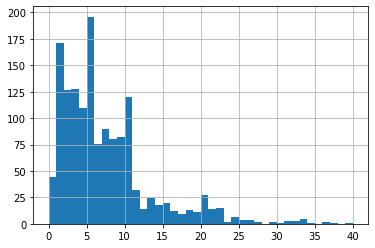

In [88]:
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0,40.1,1))
plt.show()

In [89]:
attrition_weight = attrition_pop.sample(n=400,weights="YearsAtCompany")


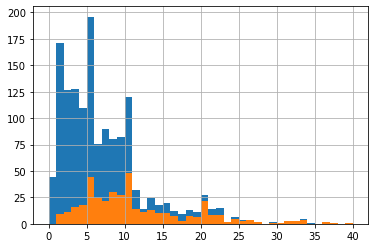

In [90]:
attrition_pop["YearsAtCompany"].hist(bins=np.arange(0,40.1,1))
attrition_weight["YearsAtCompany"].hist(bins=np.arange(0,40.1,1))
plt.show()

In [91]:
attrition_pop["YearsAtCompany"].mean()

7.0081632653061225

In [92]:
attrition_weight["YearsAtCompany"].mean()

11.23

## What a cluster...

### 1. What a cluster...

One problem with stratified sampling is that we need to collect data from every subgroup. In cases where collecting data is expensive, for example, when we have to physically travel to a location to collect it, it can make our analysis prohibitively expensive. There's a cheaper alternative called cluster sampling.

### 2. Stratified sampling vs. cluster sampling

The stratified sampling approach was to split the population into subgroups, then use simple random sampling on each of them. Cluster sampling means that we limit the number of subgroups in the analysis by picking a few of them with simple random sampling. We then perform simple random sampling on each subgroup as before.

### 3. Varieties of coffee

Let's return to the coffee dataset and look at the varieties of coffee. In this image, each bean represents the whole subgroup rather than an individual coffee, and there are twenty-eight of them. To extract unique varieties, we use the dot-unique method. This returns an array, so wrapping it in the list function creates a list of unique varieties. Let's suppose that it's expensive to work with all of the different varieties. Enter cluster sampling.

In [94]:
varieties_pop = list(coffee_rating["variety"].unique())
varieties_pop

[None,
 'Other',
 'Bourbon',
 'Catimor',
 'Ethiopian Yirgacheffe',
 'Caturra',
 'SL14',
 'Sumatra',
 'SL34',
 'Hawaiian Kona',
 'Yellow Bourbon',
 'SL28',
 'Gesha',
 'Catuai',
 'Pacamara',
 'Typica',
 'Sumatra Lintong',
 'Mundo Novo',
 'Java',
 'Peaberry',
 'Pacas',
 'Mandheling',
 'Ruiru 11',
 'Arusha',
 'Ethiopian Heirlooms',
 'Moka Peaberry',
 'Sulawesi',
 'Blue Mountain',
 'Marigojipe',
 'Pache Comun']

### 4. Stage 1: sampling for subgroups

The first stage of cluster sampling is to randomly cut down the number of varieties, and we do this by randomly selecting them. Here, we've used the random-dot-sample function from the random package to get three varieties, specified using the argument k.

In [136]:
import random
varieties_samp = random.sample(varieties_pop,k=3)
varieties_samp

['Catimor', 'Pacamara', 'Catuai']

### 5. Stage 2: sampling each group

The second stage of cluster sampling is to perform simple random sampling on each of the three varieties we randomly selected. We first filter the dataset for rows where the variety is one of the three selected, using the dot-isin method. To ensure that the isin filtering removes levels with zero rows, we apply the cat-dot-remove_unused_categories method on the Series of focus, which is variety here. If we exclude this method, we might receive an error when sampling by variety level. The pandas code is the same as for stratified sampling. Here, we've opted for equal counts sampling, with five rows from each remaining variety.

In [137]:
variety_condition = coffee_rating["variety"].isin(varieties_samp)
coffee_rating_cluster = coffee_rating[variety_condition]


In [127]:
coffee_rating_cluster = coffee_rating_cluster.assign(variety = coffee_rating_cluster["variety"].astype("category"))

In [139]:
coffee_rating_cluster.groupby("variety").sample(n=5,random_state=2021)

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
192,84.25,Arabica,松澤宏樹 koju matsuzawa,Thailand,matsuzawa coffee,MCCRNX115/16,matsuzawa coffee,None,matsuzawa coffee,1200,...,Green,0.0,"November 2nd, 2017",Specialty Coffee Institute of Asia,726e4891cf2c9a4848768bd34b668124d12c4224,b70da261fcc84831e3e9620c30a8701540abc200,m,1200.0,1200.0,1200.0
444,83.17,Arabica,"sunvirtue co., ltd.",Vietnam,apollo estate,Oriental Paris Natural Coffee,yes,None,"sunvirtue co., ltd.",1550,...,None,0.0,"May 8th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1550.0,1550.0,1550.0
1105,80.17,Arabica,"sunvirtue co., ltd.",Vietnam,apollo estate,Oriental Paris Civet Coffee,yes,None,"sunvirtue co., ltd.",1550,...,None,2.0,"May 9th, 2018",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1550.0,1550.0,1550.0
447,83.17,Arabica,yunnan coffee exchange,China,chen lin,YNC-16056,mojiang jinggong estate speciality development...,None,yunnan coffee exchange,1200,...,Green,0.0,"April 6th, 2017",Yunnan Coffee Exchange,683fa6014608fc10ff681b0435b0b2dbe6df988f,f6d87a6c04653c569d4911a66f89d5e30ce83b93,m,1200.0,1200.0,1200.0
160,84.50,Arabica,yunnan coffee exchange,China,menglian ban’an coffee processing factory,YNC-16018,menglian ban’an coffee processing factory,None,yunnan coffee exchange,1680,...,Green,1.0,"April 6th, 2017",Yunnan Coffee Exchange,683fa6014608fc10ff681b0435b0b2dbe6df988f,f6d87a6c04653c569d4911a66f89d5e30ce83b93,m,1680.0,1680.0,1680.0
706,82.33,Arabica,pedro santos e silva,Brazil,fazenda são pedro,0063/17,alfenas,None,olam,982,...,Green,11.0,"February 9th, 2018",Brazil Specialty Coffee Association,3297cfa4c538e3dd03f72cc4082c54f7999e1f9d,8900f0bf1d0b2bafe6807a73562c7677d57eb980,m,982.0,982.0,982.0
113,84.92,Arabica,nucoffee,Brazil,sitio claro,None,None,002/1251/0066,nucoffee,1000 m,...,Green,2.0,"December 2nd, 2012",NUCOFFEE,567f200bcc17a90070cb952647bf88141ad9c80c,aa2ff513ffb9c844462a1fb07c599bce7f3bb53d,m,1000.0,1000.0,1000.0
1043,80.75,Arabica,cadexsa,Honduras,bethel,None,cadexsa,13-63-318,cadexsa,1350,...,Green,2.0,"May 21st, 2016",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1350.0,1350.0,1350.0
128,84.67,Arabica,rodrigo soto,Costa Rica,rio jorco,Tarrazu,rio jorco,5-423-0128,panamerican coffee trading,1150,...,Blue-Green,2.0,"October 4th, 2017",Specialty Coffee Association of Costa Rica,8e0b118f3cf3121ab27c5387deacdb7d4d2a60b1,5eb2b7129d9714c43825e44dc3bca9423de209e9,m,1150.0,1150.0,1150.0
1185,79.17,Arabica,janny marlith torres,Honduras,la bendicion,Lot # 331,dry in solar beds,13-154-234,coffee planet corporation s.a,1650,...,Green,5.0,"July 27th, 2018",Instituto Hondureño del Café,b4660a57e9f8cc613ae5b8f02bfce8634c763ab4,7f521ca403540f81ec99daec7da19c2788393880,m,1650.0,1650.0,1650.0


### 6. Stage 2 output

Here's the first few columns of the result. Notice that there are the fifteen rows, which we'd expect from sampling five rows from three varieties.

### 7. Multistage sampling

Note that we had two stages in the cluster sampling. We randomly sampled the subgroups to include, then we randomly sampled rows from those subgroups. Cluster sampling is a special case of multistage sampling. It's possible to use more than two stages. A common example is national surveys, which can include several levels of administrative regions, like states, counties, cities, and neighborhoods.

### 8. Let's practice!

Time to sample some clusters.

## Cluster sampling

<p>Now that you know when to use cluster sampling, it's time to put it into action. In this exercise, you'll explore the <code>JobRole</code> column of the attrition dataset. You can think of each job role as a subgroup of the whole population of employees.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code> is loaded with its usual alias, and the <code>random</code> package is available. A seed of <code>19790801</code> has also been set with <code>random.seed()</code>.</p>

Create a list of unique <code>JobRole</code> values from <code>attrition_pop</code>, and assign to <code>job_roles_pop</code>.

In [142]:
random.seed(19790801)
# Create a list of unique JobRole values
job_roles_pop = list(attrition_pop["JobRole"].unique())

Randomly sample four <code>JobRole</code> values from <code>job_roles_pop</code>.

In [143]:

# Randomly sample four JobRole values
job_roles_samp = random.sample(job_roles_pop,k=4)

# Print the result
print(job_roles_samp)

['Research_Director', 'Research_Scientist', 'Human_Resources', 'Manager']


In [144]:
jobrole_condition = attrition_pop["JobRole"].isin(job_roles_samp)
attrition_filtered = attrition_pop[jobrole_condition]
print(attrition_filtered)

      Age  Attrition BusinessTravel  DailyRate            Department  \
0      21        0.0  Travel_Rarely        391  Research_Development   
5      27        0.0     Non-Travel        443  Research_Development   
6      18        0.0     Non-Travel        287  Research_Development   
10     18        0.0     Non-Travel       1431  Research_Development   
17     31        0.0  Travel_Rarely       1082  Research_Development   
...   ...        ...            ...        ...                   ...   
1462   54        0.0  Travel_Rarely        584  Research_Development   
1464   55        0.0  Travel_Rarely        452  Research_Development   
1465   55        0.0  Travel_Rarely       1117                 Sales   
1466   58        0.0     Non-Travel        350                 Sales   
1469   58        1.0  Travel_Rarely        286  Research_Development   

      DistanceFromHome Education EducationField EnvironmentSatisfaction  \
0                   15   College  Life_Sciences             

In [150]:
attrition_filtered = attrition_filtered.assign(JobRole = attrition_filtered["JobRole"].cat.remove_unused_categories())



In [151]:
attrition_filtered.JobRole.value_counts()

Research_Scientist    292
Manager               102
Research_Director      80
Human_Resources        52
Name: JobRole, dtype: int64

In [152]:

# Randomly sample 10 employees from each sampled job role
attrition_clust = attrition_filtered.groupby("JobRole").sample(n=10,random_state=2022)


# Print the sample
print(attrition_clust)

      Age  Attrition     BusinessTravel  DailyRate            Department  \
1348   44        1.0      Travel_Rarely       1376       Human_Resources   
886    41        0.0         Non-Travel        552       Human_Resources   
983    39        0.0      Travel_Rarely        141       Human_Resources   
88     27        1.0  Travel_Frequently       1337       Human_Resources   
189    34        0.0      Travel_Rarely        829       Human_Resources   
160    24        0.0  Travel_Frequently        897       Human_Resources   
839    46        0.0      Travel_Rarely        991       Human_Resources   
966    30        0.0      Travel_Rarely       1240       Human_Resources   
162    28        0.0         Non-Travel        280       Human_Resources   
1231   37        0.0      Travel_Rarely       1239       Human_Resources   
1375   44        0.0      Travel_Rarely       1315  Research_Development   
1462   54        0.0      Travel_Rarely        584  Research_Development   
1316   45   

## Straight to the point (estimate)

### 1. Straight to the point (estimate)

Let's review the various sampling techniques we learned about.

### 2. Review of sampling techniques - setup

For convenience, we'll stick to the six countries with the most coffee varieties that we used before. This corresponds to eight hundred and eighty rows and eight columns, retrieved using the dot-shape attribute.

In [167]:
top_counted_countries = list(top_counts.index.values[:6])
print(top_counted_countries)

['Mexico', 'Colombia', 'Guatemala', 'Brazil', 'Taiwan', 'United States (Hawaii)']


In [155]:
coffee_rating_top.shape

(880, 43)

### 3. Review of simple random sampling

Simple random sampling uses dot-sample with either n or frac set to determine how many rows to pseudo-randomly choose, given a seed value set with random_state. The simple random sample returns two hundred and ninety-three rows because we specified frac as one-third, and one-third of eight hundred and eighty is just over two hundred and ninety-three.

In [156]:
coffee_rating_srs  = coffee_rating_top.sample(frac=1/3,random_state=2021)
coffee_rating_srs.shape

(293, 43)

### 4. Review of stratified sampling

Stratified sampling groups by the country subgroup before performing simple random sampling on each subgroup. Given each of these top countries have quite a few rows, stratifying produces the same number of rows as the simple random sample.

In [157]:
coffee_rating_strat = coffee_rating_top.groupby("country_of_origin").sample(frac=1/3,random_state=2021)
coffee_rating_strat.shape

(293, 43)

### 5. Review of cluster sampling

In the cluster sample, we've used two out of six countries to roughly mimic frac equals one-third from the other sample types. Setting n equal to one-sixth of the total number of rows gives roughly equal sample sizes in each of the two subgroups. Using dot-shape again, we see that this cluster sample has close to the same number of rows: two-hundred-ninety-two compared to two-hundred-ninety-three for the other sample types.

In [174]:
top_countries_sample = random.sample(top_counted_countries,k=2)
top_condition = coffee_rating_top["country_of_origin"].isin(top_countries_sample)
coffee_rating_cluster = coffee_rating_top[top_condition]
coffee_rating_cluster = coffee_rating_cluster.groupby("country_of_origin").sample(n=len(coffee_rating_top) // 6)

In [176]:
coffee_rating_cluster.shape

(292, 43)

### 6. Calculating mean cup points

Let's calculate a population parameter, the mean of the total cup points. When the population parameter is the mean of a field, it's often called the population mean. Remember that in real-life scenarios, we typically wouldn't know what the population mean is. Since we have it here, though, we can use this value of eighty-one-point-nine as a gold standard to measure against. Now we'll calculate the same value using each of the sampling techniques we've discussed. These are point estimates of the mean, often called sample means. The simple and stratified sample means are really close to the population mean. Cluster sampling isn't quite as close, but that's typical. Cluster sampling is designed to give us an answer that's almost as good while using less data.

In [181]:
mean_cup_points = pd.DataFrame()
mean_cup_points = mean_cup_points.assign(Population = [coffee_rating_top["total_cup_points"].mean()],
                                         SimpleRandomSample = [coffee_rating_srs["total_cup_points"].mean()],
                                         StratifiedSample = [coffee_rating_strat["total_cup_points"].mean()],
                                         ClusterSample = [coffee_rating_cluster["total_cup_points"].mean()])
mean_cup_points.T

,0
Population,81.947000
SimpleRandomSample,81.913311
StratifiedSample,81.925666
ClusterSample,82.389692


### 7. Mean cup points by country: simple random

Here's a slightly more complicated calculation of the mean total cup points for each country. We group by country before calculating the mean to return six numbers. So how do the numbers from the simple random sample compare? The sample means are pretty close to the population means.

In [192]:
mean_cup_points_by_country = pd.DataFrame()
mean_cup_points_by_country = mean_cup_points_by_country.assign(Population = coffee_rating_top.groupby("country_of_origin")["total_cup_points"].mean(),
                                         SimpleRandomSample = coffee_rating_srs.groupby("country_of_origin")["total_cup_points"].mean(),
                                         StratifiedSample = coffee_rating_strat.groupby("country_of_origin")["total_cup_points"].mean(),
                                         ClusterSample = coffee_rating_cluster.groupby("country_of_origin")["total_cup_points"].mean())
mean_cup_points_by_country

,Population,SimpleRandomSample,StratifiedSample,ClusterSample
country_of_origin,,,,
Brazil,82.405909,82.251875,82.499773,NaN
Colombia,83.106557,82.961014,83.288197,83.110137
Guatemala,81.846575,81.392917,81.727667,81.669247
Mexico,80.890085,81.152000,80.994684,NaN
Taiwan,82.001333,81.957391,81.846800,NaN
United States (Hawaii),81.820411,81.766400,81.051667,NaN


### 8. Mean cup points by country: stratified

The same is true of the sample means from the stratified technique. Each sample mean is relatively close to the population mean.

### 9. Mean cup points by country: cluster

With cluster sampling, while the sample means are pretty close to the population means, the obvious limitation is that we only get values for the two countries that were included in the sample. If the mean cup points for each country is an important metric in our analysis, cluster sampling would be a bad idea.

### 10. Let's practice!

Let's calculate some summary statistics.

## 3 kinds of sampling

<p>You're going to compare the performance of point estimates using simple, stratified, and cluster sampling. Before doing that, you'll have to set up the samples.</p>
<p>You'll use the <code>RelationshipSatisfaction</code> column of the <code>attrition_pop</code> dataset, which categorizes the employee's relationship with the company. It has four levels: <code>Low</code>, <code>Medium</code>, <code>High</code>, and <code>Very_High</code>. <code>pandas</code> has been loaded with its usual alias, and the <code>random</code> package has been loaded.</p>

Perform simple random sampling on <code>attrition_pop</code> to get one-quarter of the population, setting the seed to <code>2022</code>.

In [205]:
attrition_pop.columns


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [193]:
# Perform simple random sampling to get 0.25 of the population
attrition_srs = attrition_pop.sample(frac=0.25,random_state =2022)

Perform stratified sampling on <code>attrition_pop</code> to sample one-quarter of each <code>RelationshipSatisfaction</code> group, setting the seed to <code>2022</code>.

In [196]:
# Perform stratified sampling to get 0.25 of each relationship group
attrition_strat = attrition_pop.groupby("RelationshipSatisfaction").sample(frac=0.25)

Create a list of unique values from <code>attrition_pop</code>'s <code>RelationshipSatisfaction</code> column.

Randomly sample <code>satisfaction_unique</code> to get two values.

Subset the population for rows where <code>RelationshipSatisfaction</code> is in <code>satisfaction_samp</code> and clear any unused categories from <code>RelationshipSatisfaction</code>; assign to <code>attrition_clust_prep</code>.

Perform cluster sampling on the selected satisfaction groups, sampling one quarter of the <em>population</em> and setting the seed to <code>2022</code>.

In [204]:
# Create a list of unique RelationshipSatisfaction values
satisfaction_unique = list(attrition_pop["RelationshipSatisfaction"].unique())

# Randomly sample 2 unique satisfaction values
satisfaction_samp = random.sample(satisfaction_unique,k=2)

# Filter for satisfaction_samp and clear unused categories from RelationshipSatisfaction
satis_condition = attrition_pop["RelationshipSatisfaction"].isin(satisfaction_samp)
attrition_clust_prep = attrition_pop[satis_condition]
attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep["RelationshipSatisfaction"].cat.remove_unused_categories()


# Perform cluster sampling on the selected group, getting 0.25 of attrition_pop
attrition_clust = attrition_clust_prep.groupby("RelationshipSatisfaction").sample(n = len(attrition_pop) // 4 ,random_state=2022)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_64152\2395592764.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  attrition_clust_prep['RelationshipSatisfaction'] = attrition_clust_prep["RelationshipSatisfaction"].cat.remove_unused_categories()


## Comparing point estimates

<p>Now that you have three types of sample (simple, stratified, and cluster), you can compare point estimates from each sample to the population parameter. That is, you can calculate the same summary statistic on each sample and see how it compares to the summary statistic for the population.</p>
<p>Here, we'll look at how satisfaction with the company affects whether or not the employee leaves the company. That is, you'll calculate the proportion of employees who left the company (they have an <code>Attrition</code> value of <code>1</code>) for each value of <code>RelationshipSatisfaction</code>.</p>
<p><code>attrition_pop</code>, <code>attrition_srs</code>, <code>attrition_strat</code>, and <code>attrition_clust</code> are available; <code>pandas</code> is loaded with its usual alias.</p>

In [206]:
# Mean Attrition by RelationshipSatisfaction group
mean_attrition_pop = attrition_pop.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_pop)

RelationshipSatisfaction
Low          0.206522
Medium       0.148515
High         0.154684
Very_High    0.148148
Name: Attrition, dtype: float64


In [207]:
# Calculate the same thing for the simple random sample
mean_attrition_srs = attrition_srs.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_srs)

RelationshipSatisfaction
Low          0.134328
Medium       0.164179
High         0.160000
Very_High    0.155963
Name: Attrition, dtype: float64


In [209]:
# Calculate the same thing for the stratified sample
mean_attrition_strat = attrition_strat.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_strat)

RelationshipSatisfaction
Low          0.202899
Medium       0.157895
High         0.173913
Very_High    0.101852
Name: Attrition, dtype: float64


In [208]:
# Calculate the same thing for the cluster sample
mean_attrition_clust = attrition_clust.groupby("RelationshipSatisfaction")["Attrition"].mean()

# Print the result
print(mean_attrition_clust)

RelationshipSatisfaction
High         0.149864
Very_High    0.160763
Name: Attrition, dtype: float64


# The n's justify the means

## An ample sample

### 1. An ample sample

Let's see how the size of the sample affects the accuracy of the point estimates we calculate.

### 2. Sample size is number of rows

The sample size, calculated here with the len function, is the number of observations, that is, the number of rows in the sample. That's true whichever method we use to create the sample. We'll stick to looking at simple random sampling since it works well in most cases and it's easier to reason about.

In [210]:
len(coffee_rating.sample(n=300))

300

In [211]:
len(coffee_rating.sample(frac=0.25))

334

### 3. Various sample sizes

Let's calculate a population parameter, the mean cup points of the coffees. It's around eighty-two-point-one-five. This is our gold standard to compare against. If we take a sample size of ten, the point estimate of this parameter is wrong by about point-eight-eight. Increasing the sample size to one hundred gets us closer; the estimate is only wrong by about point-three-four. Increasing the sample size further to one thousand brings the estimate to about point-zero-three away from the population parameter. In general, larger sample sizes will give us more accurate results.

In [212]:
coffee_rating["total_cup_points"].mean()

82.15120328849018

In [213]:
coffee_rating.sample(n=10)["total_cup_points"].mean()

82.574

In [214]:
coffee_rating.sample(n=100)["total_cup_points"].mean()

82.36220000000002

In [215]:
coffee_rating.sample(n=1000)["total_cup_points"].mean()

82.20348999999993

### 4. Relative errors

For any of these sample sizes, we want to compare the population mean to the sample mean. This is the same code we just saw, but with the numerical sample size replaced with a variable named sample_size. The most common metric for assessing the difference between the population and a sample mean is the relative error. The relative error is the absolute difference between the two numbers; that is, we ignore any minus signs, divided by the population mean. Here, we also multiply by one hundred to make it a percentage.

In [220]:
population_mean = coffee_rating["total_cup_points"].mean()
population_mean

82.15120328849018

In [222]:
sample_size =100
sample_mean = coffee_rating.sample(n=sample_size)["total_cup_points"].mean()
sample_mean

82.4596

In [226]:
rel_error_pct = 100 * (abs(population_mean - sample_mean) / population_mean)

In [224]:
rel_error_pct

0.3754013321348669

### 5. Relative error vs. sample size

Here's a line plot of relative error versus sample size. We see that the relative error decreases as the sample size increases, and beyond that, the plot has other important properties. Firstly, the blue line is really noisy, particularly for small sample sizes. If our sample size is small, the sample mean we calculate can be wildly different by adding one or two more random rows to the sample. Secondly, the amplitude of the line is quite steep, to begin with. When we have a small sample size, adding just a few more samples can give us much better accuracy. Further to the right of the plot, the line is less steep. If we already have a large sample size, adding a few more rows to the sample doesn't bring as much benefit. Finally, at the far right of the plot, where the sample size is the whole population, the relative error decreases to zero.

In [256]:
def cal_sample_mean(x):
    return coffee_rating.sample(n=x)["total_cup_points"].mean()


In [261]:
errors = pd.DataFrame({"sample_size" : np.arange(1,len(coffee_rating),1)})
errors = errors.assign(sample_mean = errors["sample_size"].map(cal_sample_mean))
errors = errors.assign(relative_error = lambda x : 100 * abs(population_mean -x.sample_mean ) /population_mean)

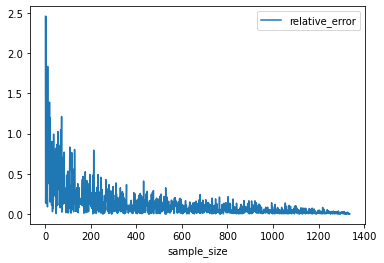

In [262]:
errors.plot(x="sample_size",y="relative_error",kind="line")
plt.show()

### 6. Let's practice!

Let's explore sample sizes.

## Calculating relative errors

<p>The size of the sample you take affects how accurately the point estimates reflect the corresponding population parameter. For example, when you calculate a sample mean, you want it to be close to the population mean. However, if your sample is too small, this might not be the case.</p>
<p>The most common metric for assessing accuracy is <em>relative error</em>. This is the absolute difference between the population parameter and the point estimate, all divided by the population parameter. It is sometimes expressed as a percentage.</p>
<p><code>attrition_pop</code> and <code>mean_attrition_pop</code> (the mean of the <code>Attrition</code> column of <code>attrition_pop</code>) are available; <code>pandas</code> is loaded as <code>pd</code>.</p>

In [270]:
mean_attrition_pop = attrition_pop["Attrition"].mean()

Generate a simple random sample from <code>attrition_pop</code> of fifty rows, setting the seed to <code>2022</code>.

In [271]:
# Generate a simple random sample of 50 rows, with seed 2022
attrition_srs50 = attrition_pop.sample(n=50,random_state=2022)

Calculate the mean employee <code>Attrition</code> in the sample.

In [272]:

# Calculate the mean employee attrition in the sample
mean_attrition_srs50 = attrition_srs50["Attrition"].mean()

Calculate the relative error between <code>mean_attrition_srs50</code> and <code>mean_attrition_pop</code> as a <em>percentage</em>.

In [273]:

# Calculate the relative error percentage
rel_error_pct50 = 100 * abs(mean_attrition_pop - mean_attrition_srs50) / mean_attrition_pop

# Print rel_error_pct50
print(rel_error_pct50)

62.78481012658227


Calculate the <em>relative error percentage</em> again. This time, use a simple random sample of one hundred rows of <code>attrition_pop</code>.

In [274]:
# Generate a simple random sample of 100 rows, with seed 2022
attrition_srs100 = attrition_pop.sample(n=100,random_state=2022)

# Calculate the mean employee attrition in the sample
mean_attrition_srs100 = attrition_srs100["Attrition"].mean()

# Calculate the relative error percentage
rel_error_pct100 = 100 * abs(mean_attrition_pop -mean_attrition_srs100) /mean_attrition_pop

# Print rel_error_pct100
print(rel_error_pct100)

6.962025316455695


## Baby back dist-rib-ution

### 1. Baby back dist-rib-ution

We just saw how point estimates like the sample mean will vary depending on which rows end up in the sample.

### 2. Same code, different answer

For example, this same code to calculate the mean cup points from a simple random sample of thirty coffees gives a slightly different answer each time. Let's try to visualize and quantify this variation.

In [275]:
coffee_rating.sample(n=30)["total_cup_points"].mean()

81.26033333333334

In [276]:
coffee_rating.sample(n=30)["total_cup_points"].mean()

82.06133333333334

In [277]:
coffee_rating.sample(n=30)["total_cup_points"].mean()

81.569

### 3. Same code, 1000 times

A for loop lets us run the same code many times. It's especially useful for situations like this where the result contains some randomness. We start by creating an empty list to store the means. Then, we set up the for loop to repeatedly sample 30 coffees from coffee_ratings a total of 1000 times, calculating the mean cup points each time. After each calculation, we append the result, also called a replicate, to the list. Each time the code is run, we get one sample mean, so running the code a thousand times generates a list of one thousand sample means.

In [ ]:
mean_cup_points_1000 = []
for i in range(1000):
    mean_cup_points_1000.append(
        coffee_rating.sample(n=30)["total_cup_points"].mean()
    )

### 4. Distribution of sample means for size 30

The one thousand sample means form a distribution of sample means. To visualize a distribution, the best plot is often a histogram. Here we can see that most of the results lie between eighty-one and eighty-three, and they roughly follow a bell-shaped curve, like a normal distribution. There's an important piece of jargon we need to know here. A distribution of replicates of sample means, or other point estimates, is known as a sampling distribution.

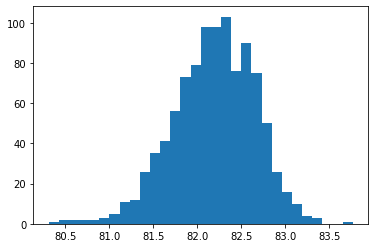

In [280]:
plt.hist(mean_cup_points_1000,bins=30)
plt.show()

### 5. Different sample sizes

Here are histograms from running the same code again with different sample sizes. When we decrease the original sample size of thirty to six, we can see from the x-values that the range of the results is broader. The bulk of the results now lie between eighty and eighty-four. On the other hand, increasing the sample size to one hundred and fifty results in a much narrower range. Now most of the results are between eighty-one-point-eight and eighty-two-point-six. As we saw previously, bigger sample sizes give us more accurate results. By replicating the sampling many times, as we've done here, we can quantify that accuracy.

In [284]:
def mean_cup_point(size):
    mean_cup_points_1000 = []
    for i in range(1000):
        mean_cup_points_1000.append(
            coffee_rating.sample(n=size)["total_cup_points"].mean()
        )
    return mean_cup_points_1000

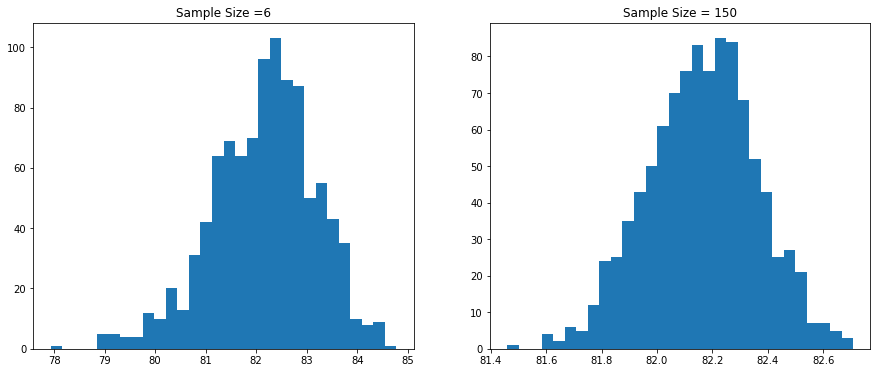

In [287]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2,figsize=(15,6))
ax1.hist(mean_cup_point(6),bins=30)
ax2.hist(mean_cup_point(150),bins=30)
ax1.set_title("Sample Size =6")
ax2.set_title("Sample Size = 150")
plt.show()

 As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution

### 6. Let's practice!

Ready to replicate?

## Replicating samples

<p>When you calculate a point estimate such as a sample mean, the value you calculate depends on the rows that were included in the sample. That means that there is some randomness in the answer. In order to quantify the variation caused by this randomness, you can create many samples and calculate the sample mean (or another statistic) for each sample.</p>
<p><code>attrition_pop</code> is available; <code>pandas</code> and <code>matplotlib.pyplot</code> are loaded with their usual aliases.</p>

Replicate the provided code so that it runs <code>500</code> times. Assign the resulting list of sample means to <code>mean_attritions</code>.

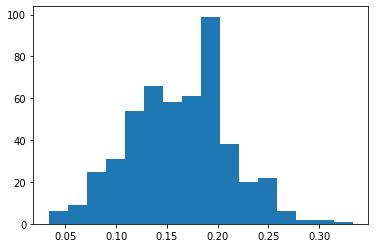

In [288]:
# Create an empty list
mean_attritions = []
# Loop 500 times to create 500 sample means
for i in range(500):
    mean_attritions.append(
        attrition_pop.sample(n=60)['Attrition'].mean()
    )

# Create a histogram of the 500 sample means
plt.hist(mean_attritions,bins=16)
plt.show()

 As sample size increases, on average each sample mean has a lower relative error compared to the population mean, thus reducing the range of the distribution

## Be our guess, put our samples to the test

### 1. Be our guess, put our samples to the test

In the last exercise, we saw that while increasing the number of replicates didn't affect the relative error of the sample means; it did result in a more consistent shape to the distribution.

### 2. 4 dice

Let's consider the case of four six-sided dice rolls. We can generate all possible combinations of rolls using the expand_grid function, which is defined in the pandas documentation, and uses the itertools package. There are six to the power four, or one-thousand-two-hundred-ninety-six possible dice roll combinations.

In [292]:
import itertools

In [293]:
def expand_grid(data_dict):
    rows = itertools.product(*data_dict.values())
    return pd.DataFrame.from_records(rows,columns=data_dict.keys())

dice = expand_grid({
    "die1" : [1,2,3,4,5,6],
    "die2" : [1,2,3,4,5,6],
    "die3" : [1,2,3,4,5,6],
    "die4" : [1,2,3,4,5,6],
})

In [294]:
dice.shape

(1296, 4)

### 3. Mean roll

Let's consider the mean of the four rolls by adding a column to our DataFrame called mean_roll. mean_roll ranges from 1, when four ones are rolled, to 6, when four sixes are rolled.

In [295]:
dice = dice.assign(mean_roll = lambda x : x.sum(axis=1) / 4)
dice

,die1,die2,die3,die4,mean_roll
0,1,1,1,1,1.00
1,1,1,1,2,1.25
2,1,1,1,3,1.50
3,1,1,1,4,1.75
4,1,1,1,5,2.00
...,...,...,...,...,...
1291,6,6,6,2,5.00
1292,6,6,6,3,5.25
1293,6,6,6,4,5.50
1294,6,6,6,5,5.75


### 4. Exact sampling distribution

Since the mean roll takes discrete values instead of continuous values, the best way to see the distribution of mean_roll is to draw a bar plot. First, we convert mean_roll to a categorical by setting its type to category. We are interested in the counts of each value, so we use dot-value_counts, passing the sort equals False argument. This ensures the x-axis ranges from one to six instead of sorting the bars by frequency. Chaining dot-plot to value_counts, and setting kind to "bar", produces a bar plot of the mean roll distribution. This is the exact sampling distribution of the mean roll because it contains every single combination of die rolls.

<AxesSubplot:>

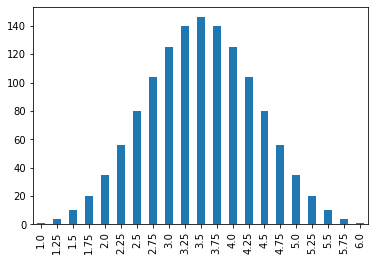

In [297]:
dice["mean_roll"] =dice["mean_roll"].astype("category")
dice["mean_roll"].value_counts(sort=False).plot(kind="bar")

### 5. The number of outcomes increases fast

If we increase the number of dice in our scenario, the number of possible outcomes increases by a factor of six each time. These values can be shown by creating a DataFrame with two columns: n_dice, ranging from 1 to 100, and n_outcomes, which is the number of possible outcomes, calculated using six to the power of the number of dice. With just one hundred dice, the number of outcomes is about the same as the number of atoms in the universe: six-point-five times ten to the seventy-seventh power. Long before you start dealing with big datasets, it becomes computationally impossible to calculate the exact sampling distribution. That means we need to rely on approximations.

In [298]:
n_dice = list(range(1,101))
n_outcomes = []
for n in n_dice:
    n_outcomes.append(6**n)



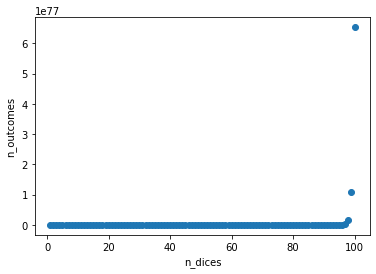

In [300]:
plt.scatter(x=n_dice,y=n_outcomes)
plt.xlabel("n_dices")
plt.ylabel("n_outcomes")
plt.show()

### 6. Simulating the mean of four dice rolls

We can generate a sample mean of four dice rolls using NumPy's random-dot-choice method, specifying size as four. This will randomly choose values from a specified list, in this case, four values from the numbers one to six, which is created using a range from one to seven wrapped in the list function. Notice that we set replace equals True because we can roll the same number several times.

In [303]:
print(np.random.choice(list(range(1,7)),size=4,replace=True))

[3 3 6 6]


### 7. Simulating the mean of four dice rolls

Then we use a for loop to generate lots of sample means, in this case, one thousand. We again use the dot-append method to populate the sample means list with our simulated sample means. The output contains a sampling of many of the same values we saw with the exact sampling distribution.

In [305]:
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1,7)),size=4,replace=True).mean()
    )

### 8. Approximate sampling distribution

Here's a histogram of the approximate sampling distribution of mean rolls. This time, it uses the simulated rather than the exact values. It's known as an approximate sampling distribution. Notice that although it isn't perfect, it's pretty close to the exact sampling distribution. Usually, we don't have access to the whole population, so we can't calculate the exact sampling distribution. However, we can feel relatively confident that using an approximation will provide a good guess as to how the sampling distribution will behave.

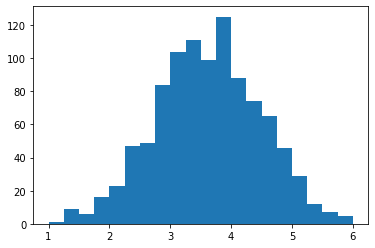

In [307]:
plt.hist(sample_means_1000,bins=20)
plt.show()

### 9. Let's practice!

Let's sample some distributions!

## Exact sampling distribution

<p>To quantify how the point estimate (sample statistic) you are interested in varies, you need to know all the possible values it can take and how often. That is, you need to know its distribution.</p>
<p>The distribution of a sample statistic is called the <em>sampling distribution</em>. When we can calculate this exactly, rather than using an approximation, it is known as the <em>exact sampling distribution</em>.</p>
<p>Let's take another look at the sampling distribution of dice rolls. This time, we'll look at five eight-sided dice. (These have the numbers one to eight.)</p>
<p><img src="https://assets.datacamp.com/production/repositories/5975/datasets/001ee1102f4838b0806d9b3592ce76ce454c3892/shutterstock_231673213_8_sided_die.jpeg" alt="8 sided die"></p>
<p><code>pandas</code>, <code>numpy</code>, and <code>matplotlib.pyplot</code> are loaded with their usual aliases. The <code>expand_grid()</code> function is also available, which expects a dictionary of key-value pairs as its argument. The definition of the <code>expand_grid()</code> function is provided in the <a href="https://pandas.pydata.org/pandas-docs/version/0.17.1/cookbook.html#creating-example-data" target="_blank" rel="noopener noreferrer">pandas documentation</a>.</p>

Expand a grid representing 5 8-sided dice. That is, create a DataFrame with five columns from a dictionary, named <code>die1</code> to <code>die5</code>. The rows should contain all possibilities for throwing five dice, each numbered <code>1</code> to <code>8</code>.

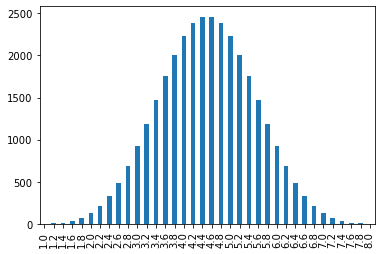

In [308]:
# Expand a grid representing 5 8-sided dice
dice = expand_grid(
    {'die1': [1, 2, 3, 4, 5, 6, 7, 8],
     'die2': [1, 2, 3, 4, 5, 6, 7, 8],
     'die3': [1, 2, 3, 4, 5, 6, 7, 8],
     'die4': [1, 2, 3, 4, 5, 6, 7, 8],
     'die5': [1, 2, 3, 4, 5, 6, 7, 8]
     })

# Add a column of mean rolls and convert to a categorical
dice['mean_roll'] = (dice['die1'] + dice['die2'] +
                     dice['die3'] + dice['die4'] +
                     dice['die5']) / 5
dice['mean_roll'] = dice['mean_roll'].astype('category')

# Draw a bar plot of mean_roll
dice["mean_roll"].value_counts(sort=False).plot(kind ="bar")
plt.show()

## Approximate sampling distribution

<p>Calculating the exact sampling distribution is only possible in very simple situations. With just five eight-sided dice, the number of possible rolls is <code>8**5</code>, which is over thirty thousand. When the dataset is more complicated, for example, where a variable has hundreds or thousands of categories, the number of possible outcomes becomes too difficult to compute exactly.</p>
<p>In this situation, you can calculate an <em>approximate sampling distribution</em> by simulating the exact sampling distribution. That is, you can repeat a procedure over and over again to simulate both the sampling process and the sample statistic calculation process.</p>
<p><code>pandas</code>, <code>numpy</code>, and <code>matplotlib.pyplot</code> are loaded with their usual aliases.</p>

Sample one to eight, five times, with replacement. Assign to <code>five_rolls</code>.

Calculate the mean of <code>five_rolls</code>.

In [309]:
# Sample one to eight, five times, with replacement
five_rolls = np.random.choice(list(range(1,9)),size=5,replace=True)

# Print the mean of five_rolls
print(five_rolls.mean())

4.6


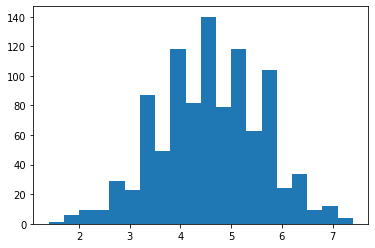

In [310]:
# Replicate the sampling code 1000 times
sample_means_1000 = []
for i in range(1000):
    sample_means_1000.append(
        np.random.choice(list(range(1, 9)), size=5, replace=True).mean()
    )

# Draw a histogram of sample_means_1000 with 20 bins
plt.hist(sample_means_1000,bins=20)
plt.show()

 The exact sampling distribution can only be calculated if you know what the population is and if the problems are small and simple enough to compute. Otherwise, the approximate sampling distribution must be used

## Err on the side of Gaussian

### 1. Err on the side of Gaussian

The Gaussian distribution (also known as the normal distribution) plays an important role in statistics. Its distinctive bell-shaped curve has been cropping up throughout this course.

### 2. Sampling distribution of mean cup points

Here are approximate sampling distributions of the mean cup points from the coffee dataset. Each histogram shows five thousand replicates, with different sample sizes in each case. Look at the x-axis labels. We already saw how increasing the sample size results in greater accuracy in our estimates of the population parameter, so the width of the distribution shrinks as the sample size increases. When the sample size is five, the x-axis ranges from seventy-six to eighty-six, whereas, for a sample size of three hundred and twenty, the range is from eighty-one-point-six to eighty-two-point-six. Now, look at the shape of each distribution. As the sample size increases, we can see that the shape of the curve gets closer and closer to being a normal distribution. At sample size five, the curve is only a very loose approximation since it isn't very symmetric. By sample size eighty, it is a very reasonable approximation.

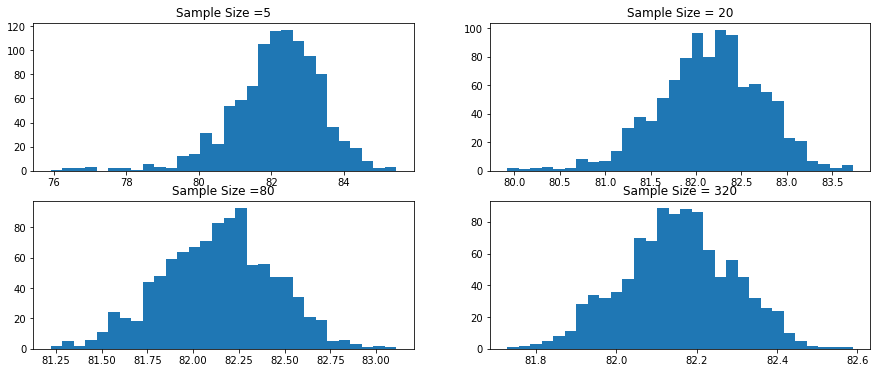

In [312]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(15,6))
ax1.hist(mean_cup_point(5),bins=30)
ax2.hist(mean_cup_point(20),bins=30)
ax3.hist(mean_cup_point(80),bins=30)
ax4.hist(mean_cup_point(320),bins=30)
ax1.set_title("Sample Size =5")
ax2.set_title("Sample Size = 20")
ax3.set_title("Sample Size =80")
ax4.set_title("Sample Size = 320")
plt.show()

### 3. Consequences of the central limit theorem

What we just saw is, in essence, what the central limit theorem tells us. The means of independent samples have normal distributions. Then, as the sample size increases, we see two things. The distribution of these averages gets closer to being normal, and the width of this sampling distribution gets narrower.

### 4. Population & sampling distribution means

Recall the population parameter of the mean cup points. We've seen this calculation before, and its value is eighty-two-point-one-five. We can also calculate summary statistics on our sampling distributions to see how they compare. For each of our four sampling distributions, if we take the mean of our sample means, we can see that we get values that are pretty close to the population parameter that the sampling distributions are trying to estimate.

In [313]:
coffee_rating["total_cup_points"].mean()

82.15120328849018

In [315]:
pd.Series([np.mean(mean_cup_point(5)),np.mean(mean_cup_point(20)),np.mean(mean_cup_point(80)),np.mean(mean_cup_point(320))],index=[5,20,80,320])

5      82.138622
20     82.129815
80     82.141731
320    82.155355
dtype: float64

### 5. Population & sampling distribution standard deviations

Now let's consider the standard deviation of the population cup points. It's about two-point-seven. By comparison, if we take the standard deviation of the sample means from each of the sampling distributions using NumPy, we get much smaller numbers, and they decrease as the sample size increases. Note that when we are calculating a population standard deviation with pandas dot-std, we must specify ddof equals zero, as dot-std calculates a sample standard deviation by default. When we are calculating a standard deviation on a sample of the population using NumPy's std function, like in these calculations on the sampling distribution, we must specify a ddof of one. So what are these smaller standard deviation values?

In [316]:
coffee_rating["total_cup_points"].std(ddof=0)

2.685858187306436

In [317]:
pd.Series([np.std(mean_cup_point(5),ddof=1),np.std(mean_cup_point(20),ddof=1),np.std(mean_cup_point(80),ddof=1),np.std(mean_cup_point(320),ddof=1)],index=[5,20,80,320])

5      1.211435
20     0.569298
80     0.288041
320    0.132555
dtype: float64

### 6. Population mean over square root sample size

One other consequence of the central limit theorem is that if we divide the population standard deviation, in this case around 2-point-7, by the square root of the sample size, we get an estimate of the standard deviation of the sampling distribution for that sample size. It isn't exact because of the randomness involved in the sampling process, but it's pretty close.<br>
<img src="image/img_4.png">

### 7. Standard error

We just saw the impact of the sample size on the standard deviation of the sampling distribution. This standard deviation of the sampling distribution has a special name: the standard error. It is useful in a variety of contexts, from estimating population standard deviation to setting expectations on what level of variability we would expect from the sampling process.

### 8. Let's practice!

Let's explore some sampling distributions.

## Population & sampling distribution means

<p>One of the useful features of sampling distributions is that you can quantify them. Specifically, you can calculate summary statistics on them. Here, you'll look at the relationship between the mean of the sampling distribution and the population parameter's mean.</p>
<p>Three sampling distributions are provided. For each, the employee attrition dataset was sampled using simple random sampling, then the mean attrition was calculated. This was done 1000 times to get a sampling distribution of mean attritions. One sampling distribution used a sample size of 5 for each replicate, one used 50, and one used 500.</p>
<p><code>attrition_pop</code>, <code>sampling_distribution_5</code>, <code>sampling_distribution_50</code>, and <code>sampling_distribution_500</code> are available; <code>numpy</code> as <code>np</code> is loaded.</p>

Calculate the mean of <code>sampling_distribution_5</code>, <code>sampling_distribution_50</code>, and <code>sampling_distribution_500</code> (a mean of sample means).

## Population & sampling distribution variation

<p>You just calculated the mean of the sampling distribution and saw how it is an estimate of the corresponding population parameter. Similarly, as a result of the central limit theorem, the standard deviation of the sampling distribution has an interesting relationship with the population parameter's standard deviation and the sample size.</p>
<p><code>attrition_pop</code>, <code>sampling_distribution_5</code>, <code>sampling_distribution_50</code>, and <code>sampling_distribution_500</code> are available; <code>numpy</code> is loaded with its usual alias.</p>

Calculate the standard deviation of <code>sampling_distribution_5</code>, <code>sampling_distribution_50</code>, and <code>sampling_distribution_500</code> (a standard deviation of sample means).

# Pull Your Data Up By Its Bootstraps

## This bears a striking resample-lance

### 1. This bears a striking resample-lance

So far, we've mostly focused on the idea of sampling without replacement.

### 2. With or without

Sampling without replacement is like dealing a pack of cards. When we deal the ace of spades to one player, we can't then deal the ace of spades to another player. Sampling with replacement is like rolling dice. If we roll a six, we can still get a six on the next roll. Sampling with replacement is sometimes called resampling. We'll use the terms interchangeably.

### 3. Simple random sampling without replacement

If we take a simple random sample without replacement, each row of the dataset, or each type of coffee, can only appear once in the sample.

### 4. Simple random sampling with replacement

If we sample with replacement, it means that each row of the dataset, or each coffee, can be sampled multiple times.

### 5. Why sample with replacement?

So far, we've been treating the coffee_ratings dataset as the population of all coffees. Of course, it doesn't include every coffee in the world, so we could treat the coffee dataset as just being a big sample of coffees. To imagine what the whole population is like, we need to approximate the other coffees that aren't in the dataset. Each of the coffees in the sample dataset will have properties that are representative of the coffees that we don't have. Resampling lets us use the existing coffees to approximate those other theoretical coffees.

### 6. Coffee data preparation

To keep it simple, let's focus on three columns of the coffee dataset. To make it easier to see which rows ended up in the sample, we'll add a row index column called index using the reset_index method.

In [318]:
coffee_focus = coffee_rating[["variety","country_of_origin","flavor"]]
coffee_focus = coffee_focus.reset_index()
coffee_focus

,index,variety,country_of_origin,flavor
0,0,None,Ethiopia,8.83
1,1,Other,Ethiopia,8.67
2,2,Bourbon,Guatemala,8.50
3,3,None,Ethiopia,8.58
4,4,Other,Ethiopia,8.50
...,...,...,...,...
1333,1333,None,Ecuador,7.58
1334,1334,None,Ecuador,7.67
1335,1335,None,United States,7.33
1336,1336,None,India,6.83


### 7. Resampling with .sample()

To sample with replacement, we call sample as usual but set the replace argument to True. Setting frac to 1 produces a sample of the same size as the original dataset.

In [319]:
coffee_resamp = coffee_focus.sample(frac=1,replace=True)
coffee_resamp

,index,variety,country_of_origin,flavor
483,483,Mundo Novo,Brazil,7.67
189,189,None,Ethiopia,7.75
696,696,Typica,Mexico,7.58
662,662,Yellow Bourbon,Brazil,7.50
322,322,Caturra,Colombia,7.75
...,...,...,...,...
393,393,None,United States (Hawaii),7.92
881,881,Sumatra,Indonesia,7.42
533,533,Bourbon,Brazil,7.58
423,423,Typica,Mexico,7.75


### 8. Repeated coffees

Counting the values of the index column shows how many times each coffee ended up in the resampled dataset. Some coffees were sampled four or five times.

In [320]:
coffee_resamp["index"].value_counts()

189     5
869     5
36      5
289     5
1221    4
       ..
96      1
61      1
124     1
625     1
423     1
Name: index, Length: 846, dtype: int64

### 9. Missing coffees

That means that some coffees didn't end up in the resample. By taking the number of distinct index values in the resampled dataset, using len on drop_duplicates, we see that eight hundred and sixty-eight different coffees were included. By comparing this number with the total number of coffees, we can see that four hundred and seventy coffees weren't included in the resample.

In [321]:
num_unique_coffees = len(coffee_resamp["index"].drop_duplicates())
num_unique_coffees

846

In [322]:
len(coffee_rating) - num_unique_coffees

492

### 10. Bootstrapping

We're going to use resampling for a technique called bootstrapping. In some sense, bootstrapping is the opposite of sampling from a population. With sampling, we treat the dataset as the population and move to a smaller sample. With bootstrapping, we treat the dataset as a sample and use it to build up a theoretical population. A use case of bootstrapping is to try to understand the variability due to sampling. This is important in cases where we aren't able to sample the population multiple times to create a sampling distribution.

### 11. Bootstrapping process

The bootstrapping process has three steps.
1. First, randomly sample with replacement to get a resample the same size as the original dataset.
2. Then, calculate a statistic, such as a mean of one of the columns. Note that the mean isn't always the choice here and bootstrapping allows for complex statistics to be computed, too.
3. Then, replicate this many times to get lots of these bootstrap statistics. Earlier in the course, we did something similar. We took a simple random sample, then calculated a summary statistic, then repeated those two steps to form a sampling distribution.
8. This time, when we've used resampling instead of sampling, we get a bootstrap distribution.

### 12. Bootstrapping coffee mean flavor

The resampling step uses the code we just saw: calling sample with frac set to one and replace set to True. Calculating a bootstrap statistic can be done with mean from NumPy. In this case, we're calculating the mean flavor score. To repeat steps one and two one thousand times, we can wrap the code in a for loop and append the statistics to a list.

### 13. Bootstrap distribution histogram

Here's a histogram of the bootstrap distribution of the sample mean. Notice that it is close to following a normal distribution.

In [323]:
mean_flavor_1000 = []
for i in range(1000):
    mean_flavor_1000.append(
        np.mean(coffee_focus.sample(frac=1 ,replace=True)["flavor"])
    )

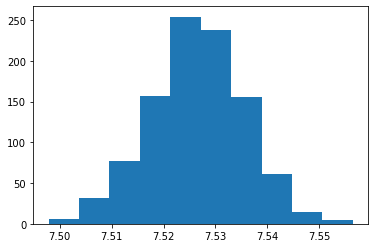

In [324]:
plt.hist(mean_flavor_1000)
plt.show()

### 14. Let's practice!

Best get bootstrapping.

## Generating a bootstrap distribution

<p>The process for generating a bootstrap distribution is similar to the process for generating a sampling distribution; only the first step is different.</p>
<p>To make a sampling distribution, you start with the population and sample without replacement. To make a bootstrap distribution, you start with a sample and sample that with replacement. After that, the steps are the same: calculate the summary statistic that you are interested in on that sample/resample, then replicate the process many times. In each case, you can visualize the distribution with a histogram.</p>
<p>Here, <code>spotify_sample</code> is a subset of the <code>spotify_population</code> dataset. To make it easier to see how resampling works, a row index column called <code>'index'</code> has been added, and only the artist name, song name, and <code>danceability</code> columns have been included.</p>
<p><code>spotify_sample</code> is available; <code>pandas</code>, <code>numpy</code>, and <code>matplotlib.pyplot</code> are loaded with their usual aliases.</p>

In [328]:
spotify_sample = spotify_population[['artists', 'name', 'danceability']]
spotify_sample = spotify_sample.reset_index()


Generate a single bootstrap resample from <code>spotify_sample</code>.

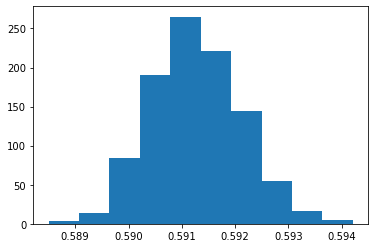

In [331]:
# Replicate this 1000 times
mean_danceability_1000 = []
for i in range(1000):
    mean_danceability_1000.append(
        np.mean(spotify_sample.sample(frac=1, replace=True)['danceability'])
    )

# Draw a histogram of the resample means
plt.hist(mean_danceability_1000)
plt.show()

## A breath of fresh error

### 1. A breath of fresh error

In the last video,

### 2. Coffee focused subset

we took a focused subset of the coffee dataset. Here's a five hundred row sample from it.

In [332]:
coffee_sample = coffee_rating[["variety","country_of_origin","flavor"]].reset_index().sample(n=500)


### 3. The bootstrap of mean coffee flavors

Here, we generate a bootstrap distribution of the mean coffee flavor scores from that sample. dot-sample generates a resample, np-dot-mean calculates the statistic, and the for loop with dot-append repeats these steps to produce a distribution of bootstrap statistics.

In [333]:
mean_flavor_5000 =[]
for i in range(5000):
    mean_flavor_5000.append(
        np.mean(coffee_sample.sample(frac=1,replace=True)["flavor"])
    )

bootstrap_dist = mean_flavor_5000

### 4. Mean flavor bootstrap distribution

Here's the histogram of the bootstrap distribution, which is close to a normal distribution.

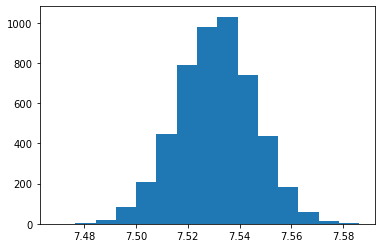

In [335]:
plt.hist(mean_flavor_5000,bins=15)
plt.show()

### 5. Sample, bootstrap distribution, population means

Here's the mean flavor score from the original sample. In the bootstrap distribution, each value is an estimate of the mean flavor score. Recall that each of these values corresponds to one potential sample mean from the theoretical population. If we take the mean of those means, we get our best guess of the population mean. The two values are really close. However, there's a problem. The true population mean is actually a little different.

In [336]:
coffee_sample["flavor"].mean()

7.530979999999997

In [337]:
np.mean(bootstrap_dist)

7.530902272

In [338]:
coffee_rating["flavor"].mean()

7.526046337817636

 ### 6. Interpreting the means

The behavior that you just saw is typical. The bootstrap distribution mean is usually almost identical to the original sample mean. However, that is not often a good thing. If the original sample wasn't closely representative of the population, then the bootstrap distribution mean won't be a good estimate of the population mean. **Bootstrapping cannot correct any potential biases due to differences between the sample and the population.**

### 7. Sample sd vs. bootstrap distribution sd

While we do have that limitation in estimating the population mean, one great thing about distributions is that we can also quantify variation. The standard deviation of the sample flavors is around zero-point-three-five-four. Recall that pandas dot-std calculates a sample standard deviation by default. If we calculate the standard deviation of the bootstrap distribution, specifying a ddof of one, then we get a completely different number. So what's going on here?

In [339]:
coffee_sample["flavor"].std()

0.33219624967267974

In [340]:
np.std(bootstrap_dist,ddof=1)

0.014924024684399803

### 8. Sample, bootstrap dist'n, pop'n standard deviations

Remember that one goal of bootstrapping is to quantify what variability we might expect in our sample statistic as we go from one sample to another. Recall that this quantity is called the standard error as measured by the standard deviation of the sampling distribution of that statistic. The standard deviation of the bootstrap means can be used as a way to estimate this measure of uncertainty. If we multiply that standard error by the square root of the sample size, we get an estimate of the standard deviation in the original population. Our estimate of the standard deviation is around point-three-five-three. The true standard deviation is around point-three-four-one, so our estimate is pretty close. In fact, it is closer than just using the sample standard deviation alone.

In [341]:
coffee_sample['flavor'].std()

0.33219624967267974

In [342]:
standand_error = np.std(bootstrap_dist,ddof=1)


In [343]:
coffee_rating["flavor"].std(ddof=0)

0.3412548122462262

In [344]:
standand_error * np.sqrt(500)

0.3337113369220281

### 9. Interpreting the standard errors

To recap, the estimated standard error is the standard deviation of the bootstrap distribution values for our statistic of interest. This estimated standard error times the square root of the sample size gives a really good estimate of the standard deviation of the population. That is, although bootstrapping was poor at estimating the population mean, it is generally great for estimating the population standard deviation.

### 10. Let's practice!

Let's play with some standard errors.

## Sampling distribution vs. bootstrap distribution

<p>The sampling distribution and bootstrap distribution are closely linked. In situations where you can repeatedly sample from a population (these occasions are rare), it's helpful to generate both the sampling distribution and the bootstrap distribution, one after the other, to see how they are related.</p>
<p>Here, the statistic you are interested in is the mean <code>popularity</code> score of the songs.</p>
<p><code>spotify_population</code> (the whole dataset) and <code>spotify_sample</code> (<code>500</code> randomly sampled rows from <code>spotify_population</code>) are available; <code>pandas</code> and <code>numpy</code> are loaded with their usual aliases.</p>

Generate a sampling distribution of 2000 replicates.

Sample 500 rows of the population without replacement and calculate the mean <code>popularity</code>.

Generate a bootstrap distribution of 2000 replicates.

Sample 500 rows of the sample with replacement and calculate the mean <code>popularity</code>.

## Compare sampling and bootstrap means

<p>To make calculation easier, distributions similar to those calculated from the previous exercise have been included, this time using a sample size of <code>5000</code>.</p>
<p><code>spotify_population</code>, <code>spotify_sample</code>, <code>sampling_distribution</code>, and <code>bootstrap_distribution</code> are available; <code>pandas</code> and <code>numpy</code> are loaded with their usual aliases.</p>

Population: from <code>spotify_population</code>, take the mean of <code>popularity</code>.

Sample: from <code>spotify_sample</code>, take the mean of <code>popularity</code>.

Sampling distribution: from <code>sampling_distribution</code>, take its mean.

Bootstrap distribution: from <code>bootstrap_distribution</code>, take its mean.

## Compare sampling and bootstrap standard deviations

<p>In the same way that you looked at how the sampling distribution and bootstrap distribution could be used to estimate the population mean, you'll now take a look at how they can be used to estimate variation, or more specifically, the standard deviation, in the population. </p>
<p>Recall that the sample size is <code>5000</code>.</p>
<p><code>spotify_population</code>, <code>spotify_sample</code>, <code>sampling_distribution</code>, and <code>bootstrap_distribution</code> are available; <code>pandas</code> and <code>numpy</code> are loaded with their usual aliases.</p>

Population: from <code>spotify_population</code>, take the standard deviation of <code>popularity</code>.

Original sample: from <code>spotify_sample</code>, take the standard deviation of <code>popularity</code>.

Sampling distribution: from <code>sampling_distribution</code>, take its standard deviation and multiply by the square root of the sample size (<code>5000</code>).

Bootstrap distribution: from <code>bootstrap_distribution</code>, take its standard deviation and multiply by the square root of the sample size.

## Venus infers

### 1. Venus infers

In the last few exercises, you looked at relationships between the sampling distribution and the bootstrap distribution.

### 2. Confidence intervals

One way to quantify these distributions is the idea of "values within one standard deviation of the mean", which gives a good sense of where most of the values in a distribution lie. In this final lesson, we'll formalize the idea of values close to a statistic by defining the term "confidence interval".

### 3. Predicting the weather

Consider meteorologists predicting weather in one of the world's most unpredictable regions - the northern Great Plains of the US and Canada. Rapid City, South Dakota was ranked as the least predictable of the 120 US cities with a National Weather Service forecast office. Suppose we've taken a job as a meteorologist at a news station in Rapid City. Our job is to predict tomorrow's high temperature.

### 4. Our weather prediction

We analyze the weather data using the best forecasting tools available to us and predict a high temperature of 47 degrees Fahrenheit. In this case, 47 degrees is our point estimate. Since the weather is variable, and many South Dakotans will plan their day tomorrow based on our forecast, we'd instead like to present a range of plausible values for the high temperature. On our weather show, we report that the high temperature will be between forty and fifty-four degrees tomorrow.

### 5. We just reported a confidence interval!

This prediction of forty to fifty-four degrees can be thought of as a confidence interval for the unknown quantity of tomorrow's high temperature. Although we can't be sure of the exact temperature, we are confident that it will be in that range. These results are often written as the point estimate followed by the confidence interval's lower and upper bounds in parentheses or square brackets. When the confidence interval is symmetric around the point estimate, we can represent it as the point estimate plus or minus the margin of error, in this case, seven degrees.

### 6. Bootstrap distribution of mean flavor

Here's the bootstrap distribution of the mean flavor from the coffee dataset.

### 7. Mean of the resamples

We can calculate the mean of these resampled mean flavors.

### 8. Mean plus or minus one standard deviation

If we create a confidence interval by adding and subtracting one standard deviation from the mean, we see that there are lots of values in the bootstrap distribution outside of this one standard deviation confidence interval.

### 9. Quantile method for confidence intervals

If we want to include ninety-five percent of the values in the confidence interval, we can use quantiles. Recall that quantiles split distributions into sections containing a particular proportion of the total data. To get the middle ninety-five percent of values, we go from the point-zero-two-five quantile to the point-nine-seven-five quantile since the difference between those two numbers is point-nine-five. To calculate the lower and upper bounds for this confidence interval, we call quantile from NumPy, passing the distribution values and the quantile values to use. The confidence interval is from around seven-point-four-eight to seven-point-five-four.

### 10. Inverse cumulative distribution function

There is a second method to calculate confidence intervals. To understand it, we need to be familiar with the normal distribution's inverse cumulative distribution function. The bell curve we've seen before is the probability density function or PDF. Using calculus, if we integrate this, we get the cumulative distribution function or CDF. If we flip the x and y axes, we get the inverse CDF. We can use scipy-dot-stats and call norm-dot-ppf to get the inverse CDF. It takes a quantile between zero and one and returns the values of the normal distribution for that quantile. The parameters of loc and scale are set to 0 and 1 by default, corresponding to the standard normal distribution. Notice that the values corresponding to point-zero-two-five and point-nine-seven-five are about minus and plus two for the standard normal distribution.

### 11. Standard error method for confidence interval

This second method for calculating a confidence interval is called the standard error method. First, we calculate the point estimate, which is the mean of the bootstrap distribution, and the standard error, which is estimated by the standard deviation of the bootstrap distribution. Then we call norm-dot-ppf to get the inverse CDF of the normal distribution with the same mean and standard deviation as the bootstrap distribution. Again, the confidence interval is from seven-point-four-eight to seven-point-five-four, though the numbers differ slightly from last time since our bootstrap distribution isn't perfectly normal.

### 12. Let's practice!

Let's calculate some confidence intervals!

## Calculating confidence intervals

<p>You have learned about two methods for calculating confidence intervals: the <em>quantile method</em> and the <em>standard error method</em>. The standard error method involves using the inverse cumulative distribution function (inverse CDF) of the normal distribution to calculate confidence intervals. In this exercise, you'll perform these two methods on the Spotify data.</p>
<p><code>spotify_population</code>, <code>spotify_sample</code>, and <code>bootstrap_distribution</code> are available; <code>pandas</code> and <code>numpy</code> are loaded with their usual aliases, and <code>norm</code> has been loaded from <code>scipy.stats</code>.</p>

Generate a 95% confidence interval using the quantile method on the bootstrap distribution, setting the <code>0.025</code> quantile as <code>lower_quant</code> and the <code>0.975</code> quantile as <code>upper_quant</code>.

Calculate <code>point_estimate</code> as the mean of <code>bootstrap_distribution</code>, and <code>standard_error</code> as the standard deviation of <code>bootstrap_distribution</code>.

Calculate <code>lower_se</code> as the <code>0.025</code> quantile of an inv. CDF from a normal distribution with mean <code>point_estimate</code> and standard deviation <code>standard_error</code>.

Calculate <code>upper_se</code> as the <code>0.975</code> quantile of that same inv. CDF.

## Congratulations

### 1. Congratulations

Congratulations on completing the course! We've covered a lot of ground!

### 2. Recap

In Chapter 1, you learned about the basic principles of sampling, the problems caused by selection bias, and what pseudo-random numbers are. In Chapter 2, you learned how to perform the four most common methods of sampling: simple random sampling, systematic sampling, stratified sampling, and cluster sampling. In Chapter 3, you learned how sample size affects estimates of population parameters, how to use repeated sampling to generate a sampling distribution, the difference between approximate and exact sampling distributions, and you encountered the central limit theorem. Finally, in Chapter 4, you learned how to perform bootstrapping to estimate population parameters from a single sample, what the standard error of a statistic is, and two ways to calculate confidence intervals.

### 3. The most important things

There are two results from the last chapter that are really important for hypothesis testing, and it's important to make sure you understand them. Firstly, the standard deviation of a bootstrap distribution statistic is a good approximation for the standard error of the sampling distribution. Secondly, you calculated confidence intervals for statistics using both the quantile method and the standard error method, and they gave very similar answers. That means that the normal distribution tends to be a good approximation for bootstrap distributions.

### 4. What's next?

Sampling is tremendously important in many areas of data science. It is used heavily in experimental design, such as designing A/B tests. It's a cornerstone of hypothesis testing and inferential statistics. Finally, understanding sampling is crucial to understanding concepts in probability and Bayesian statistics.

### 5. Happy learning!

Congratulations again! Happy learning!